In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Setting
sns.despine(left=True, bottom=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format','{:.4f}'.format)
sns.set()

%matplotlib inline

In [41]:
alert = pd.read_parquet('..\\dataset\\aggregate_alerts_bogor_preproc.parquet')
irregular = pd.read_parquet('..\\dataset\\aggregate_median_irregularities_bogor_preproc.parquet')
jams = pd.read_parquet('..\\dataset\\aggregate_median_jams_bogor_preproc.parquet')

In [33]:
alert.sample(5)

id                time                            street  \
8382  6175464 2022-08-27 20:00:00                   Kapten Muslihat   
999   5956175 2022-07-12 11:00:00               Jenderal Ahmad Yani   
1731  5984310 2022-07-17 14:00:00  KH Soleh Iskandar (Jalur Lambat)   
6984  6137764 2022-08-19 07:00:00      N9 Raden KH Abdullah bin Nuh   
9294  6204794 2022-09-02 17:00:00            Tol Lingkar Luar Bogor   

               type  total_records       date   avg_location_long  \
8382            JAM             11 2022-08-27  106.78936399999999   
999             JAM              9 2022-07-12          106.797061   
1731    ROAD_CLOSED             60 2022-07-17  106.80051600000002   
6984            JAM              6 2022-08-19         106.7607095   
9294  WEATHERHAZARD             23 2022-09-02  106.79490400000002   

          avg_location_lat           date_time  
8382    -6.595750000000001 2022-08-27 20:00:00  
999     -6.580793999999999 2022-07-12 11:00:00  
1731    -6.561997000000004 2022-07-17 14:00:00  
6984   -6.5663703333333325 2022-08-19 07:00:00  
9294    -6.562297999999999 2022-09-02 17:00:00

In [34]:
irregular.sample(5)

time                        street  jam_level  \
3370  2022-08-28 15:00:00.000  N9 Raden KH Abdullah bin Nuh          4   
2124  2022-08-07 18:00:00.000                 Atang Sanjaya          3   
3176  2022-08-27 11:00:00.000                  Semplak Raya          3   
2164  2022-08-08 10:00:00.000           N9 Jalan Raya Tajur          3   
3284  2022-08-27 20:00:00.000                Lawang Gintung          3   

      median_length  median_delay_seconds  median_regular_speed  \
3370      1980.5000              586.0000               11.4650   
2124       849.0000              507.5000               18.0600   
3176      1465.0000              533.0000               19.1500   
2164      3959.0000              677.0000               22.5100   
3284       692.0000              173.0000               23.4800   

      total_records  median_seconds  median_speed       date  \
3370             28        813.5000        7.5400 2022-08-28   
2124             18        641.0000        5.1700 2022-08-07   
3176              9        699.0000        7.0600 2022-08-27   
2164              6        989.0000       13.9450 2022-08-08   
3284             13        261.0000        9.5400 2022-08-27   

      median_jam_level       id  \
3370            4.0000  1571881   
2124            3.0000  1546328   
3176            3.0000  1569704   
2164            3.0000  1547340   
3284            3.0000  1569805   

                                               geometry           date_time  
3370  MULTILINESTRING ((106.757475 -6.569237, 106.75... 2022-08-28 15:00:00  
2124  MULTILINESTRING ((106.744807 -6.541439, 106.74... 2022-08-07 18:00:00  
3176  MULTILINESTRING ((106.760578 -6.541314, 106.76... 2022-08-27 11:00:00  
2164  MULTILINESTRING ((106.816527 -6.621295, 106.81... 2022-08-08 10:00:00  
3284  MULTILINESTRING ((106.812221 -6.621946, 106.81... 2022-08-27 20:00:00

In [31]:
jams.sample(5)

time                                       street  \
4701   2022-07-09 02:00:00.000             KH Soleh Iskandar (Jalur Lambat)   
36126  2022-07-28 11:00:00.000                              Tentara Pelajar   
49352  2022-08-04 17:00:00.000                                    Siliwangi   
27472  2022-07-23 11:00:00.000  Exit 3: Kedung Halang/Cibinong/Warung Jambu   
36963  2022-07-28 20:00:00.000                            Kedunghalang Raya   

       level  median_length  median_delay  median_speed_kmh  total_records  \
4701       5       167.0000       -1.0000            0.0000             60   
36126      2       547.0000       73.0000           14.8700              9   
49352      1       844.0000       61.0000           18.6700              1   
27472      4       253.0000      107.0000            7.2800              1   
36963      1      1789.0000      142.0000           18.7800              4   

             id       date  median_level  \
4701   33668196 2022-07-09        5.0000   
36126  34880089 2022-07-28        2.0000   
49352  35330086 2022-08-04        1.0000   
27472  34567102 2022-07-23        4.0000   
36963  34880919 2022-07-28        1.0000   

                                                geometry           date_time  
4701   MULTILINESTRING ((106.800516 -6.561997, 106.80... 2022-07-09 02:00:00  
36126  MULTILINESTRING ((106.787899 -6.577878, 106.78... 2022-07-28 11:00:00  
49352  LINESTRING (106.808862 -6.614809, 106.80969 -6... 2022-08-04 17:00:00  
27472  LINESTRING (106.812953 -6.566207, 106.811113 -... 2022-07-23 11:00:00  
36963  MULTILINESTRING ((106.806126 -6.547132, 106.80... 2022-07-28 20:00:00

In [12]:
alert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9762 entries, 0 to 9761
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 9762 non-null   int64         
 1   time               9762 non-null   datetime64[ns]
 2   street             9762 non-null   object        
 3   type               9762 non-null   object        
 4   total_records      9762 non-null   int64         
 5   avg_location_long  9762 non-null   object        
 6   avg_location_lat   9762 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 534.0+ KB


In [13]:
irregular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4051 entries, 0 to 4050
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  4051 non-null   datetime64[ns]
 1   street                4051 non-null   object        
 2   jam_level             4051 non-null   int64         
 3   median_length         4051 non-null   float64       
 4   median_delay_seconds  4051 non-null   float64       
 5   median_regular_speed  4051 non-null   float64       
 6   total_records         4051 non-null   int64         
 7   median_seconds        4051 non-null   float64       
 8   median_speed          4051 non-null   float64       
 9   median_jam_level      4051 non-null   float64       
 10  id                    4051 non-null   int64         
 11  geometry              4051 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(3), object(2)
memory usage: 379.9+ K

In [25]:
jams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102322 entries, 0 to 102321
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   time              102322 non-null  object        
 1   street            102322 non-null  object        
 2   level             102322 non-null  int64         
 3   median_length     102322 non-null  float64       
 4   median_delay      102322 non-null  float64       
 5   median_speed_kmh  102322 non-null  float64       
 6   total_records     102322 non-null  int64         
 7   id                102322 non-null  int64         
 8   date              102322 non-null  datetime64[ns]
 9   median_level      102322 non-null  float64       
 10  geometry          102322 non-null  object        
 11  date_time         102322 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(3), object(3)
memory usage: 9.4+ MB


In [35]:
print(f'alert: min date {alert.date_time.min()}, max date {alert.date_time.max()}')
print(f'irregular: min date {irregular.date_time.min()}, max date {irregular.date_time.max()}')
print(f'jams: min date {jams.date_time.min()}, max date {jams.date_time.max()}')

alert: min date 2022-07-06 00:00:00, max date 2022-09-06 00:00:00
irregular: min date 2022-07-06 09:00:00, max date 2022-09-04 21:00:00
jams: min date 2022-07-06 00:00:00, max date 2022-09-06 00:00:00


In [36]:
def clean_string(x):
    import string
    import unidecode
    
    x = x.lower().strip(string.punctuation).strip(string.whitespace)
    x = x.replace('-',' ')
    x = [i for i in x if i in string.ascii_lowercase+string.whitespace+string.digits]
    x = ''.join(x)
    return x

In [42]:
### merge column based on the time and street
### make a key based on time & street

alert['street'] = np.vectorize(lambda x: clean_string(x))(alert.street)
irregular['street'] = np.vectorize(lambda x: clean_string(x))(irregular.street)
jams['street'] = np.vectorize(lambda x: clean_string(x))(jams.street)

## Jams Dataset

In [45]:
jams['check'] = np.vectorize(lambda x, y: 1 if x-y == 0 else 0)(jams.median_level, jams.level)
print(jams.check.sum() == len(jams)) # median level & level are the same column

jams = jams.drop(['level', 'check', 'time'], axis=1)

In [46]:
jams.sample()

street  median_length  median_delay  median_speed_kmh  \
44060  pancasan atas       652.0000       60.0000           16.6900   

       total_records        id       date  median_level  \
44060              3  35154730 2022-08-01        1.0000   

                                                geometry           date_time  
44060  MULTILINESTRING ((106.786575 -6.605683, 106.78... 2022-08-01 13:00:00

In [47]:
jams.describe(include='number', datetime_is_numeric=True)

median_length  median_delay  median_speed_kmh  total_records  \
count    102322.0000   102322.0000       102322.0000    102322.0000   
mean        840.8028      131.9690           14.0849        17.5757   
std         549.8670      109.4308            7.9759        20.6822   
min          13.0000       -1.0000            0.0000         1.0000   
25%         444.0000       75.0000            7.8850         4.0000   
50%         727.0000       98.0000           13.0600        10.0000   
75%        1138.0000      145.5000           19.0900        23.0000   
max        8307.0000     2754.0000           63.6150       600.0000   

                 id  median_level  
count   102322.0000   102322.0000  
mean  35399657.0017        2.4338  
std    1092827.5256        1.0020  
min   33469019.0000        1.0000  
25%   34493314.2500        2.0000  
50%   35392022.5000        2.0000  
75%   36371024.7500        3.0000  
max   37279200.0000        5.0000

In [49]:
jams.describe(exclude='number', datetime_is_numeric=True)

street                           date  \
count                         102322                         102322   
unique                           455                            NaN   
top     n9 raden kh abdullah bin nuh                            NaN   
freq                            3658                            NaN   
mean                             NaN  2022-08-05 10:49:36.345262848   
min                              NaN            2022-07-06 00:00:00   
25%                              NaN            2022-07-22 00:00:00   
50%                              NaN            2022-08-05 00:00:00   
75%                              NaN            2022-08-21 00:00:00   
max                              NaN            2022-09-06 00:00:00   

                                                 geometry  \
count                                              102322   
unique                                              81959   
top     MULTILINESTRING ((106.800516 -6.561997, 106.80...   
freq                                                 1104   
mean                                                  NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                            date_time  
count                          102322  
unique                            NaN  
top                               NaN  
freq                              NaN  
mean    2022-08-06 00:39:43.440511488  
min               2022-07-06 00:00:00  
25%               2022-07-22 08:00:00  
50%               2022-08-05 18:00:00  
75%               2022-08-21 10:00:00  
max               2022-09-06 00:00:00

### Univariate

Numerical columns distribution

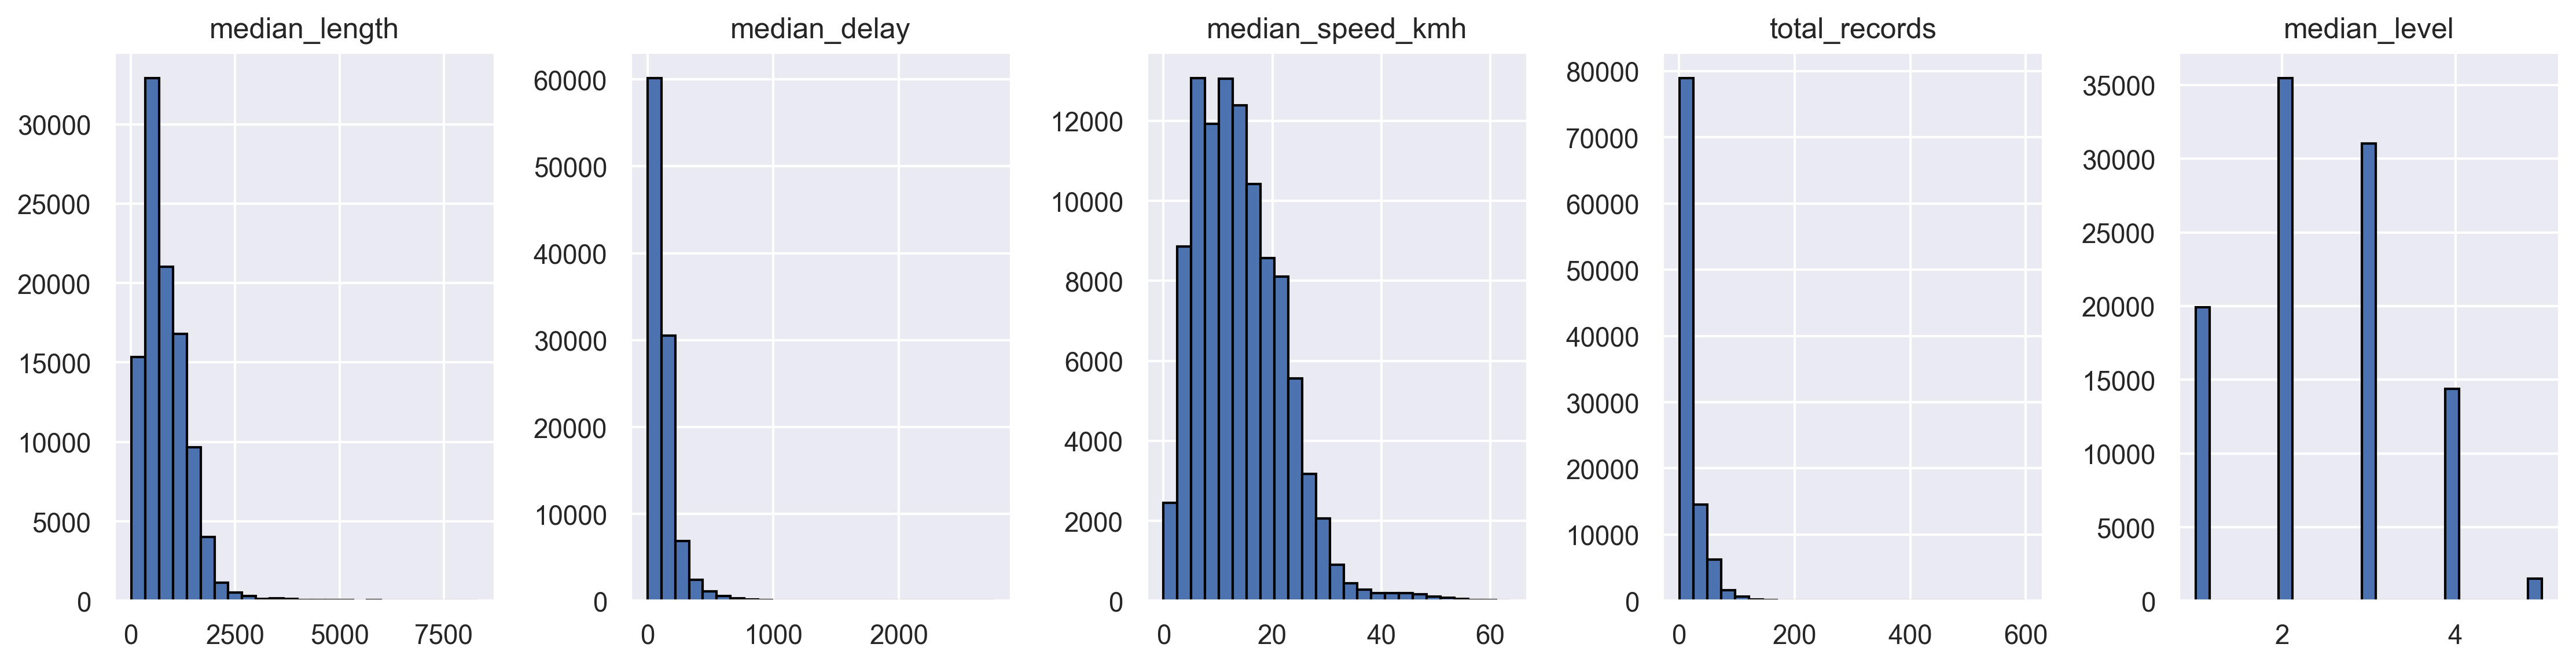

In [55]:
(
    jams
    .loc[:, ['median_length', 'median_delay', 'median_speed_kmh', 'total_records', 'median_level']]
    .hist(bins=25, figsize=(15,4), layout=(-1,5), edgecolor="black")
)

plt.tight_layout();

Categorical Columns Distribution

<AxesSubplot:title={'center':'The most frequent street'}, xlabel='index'>

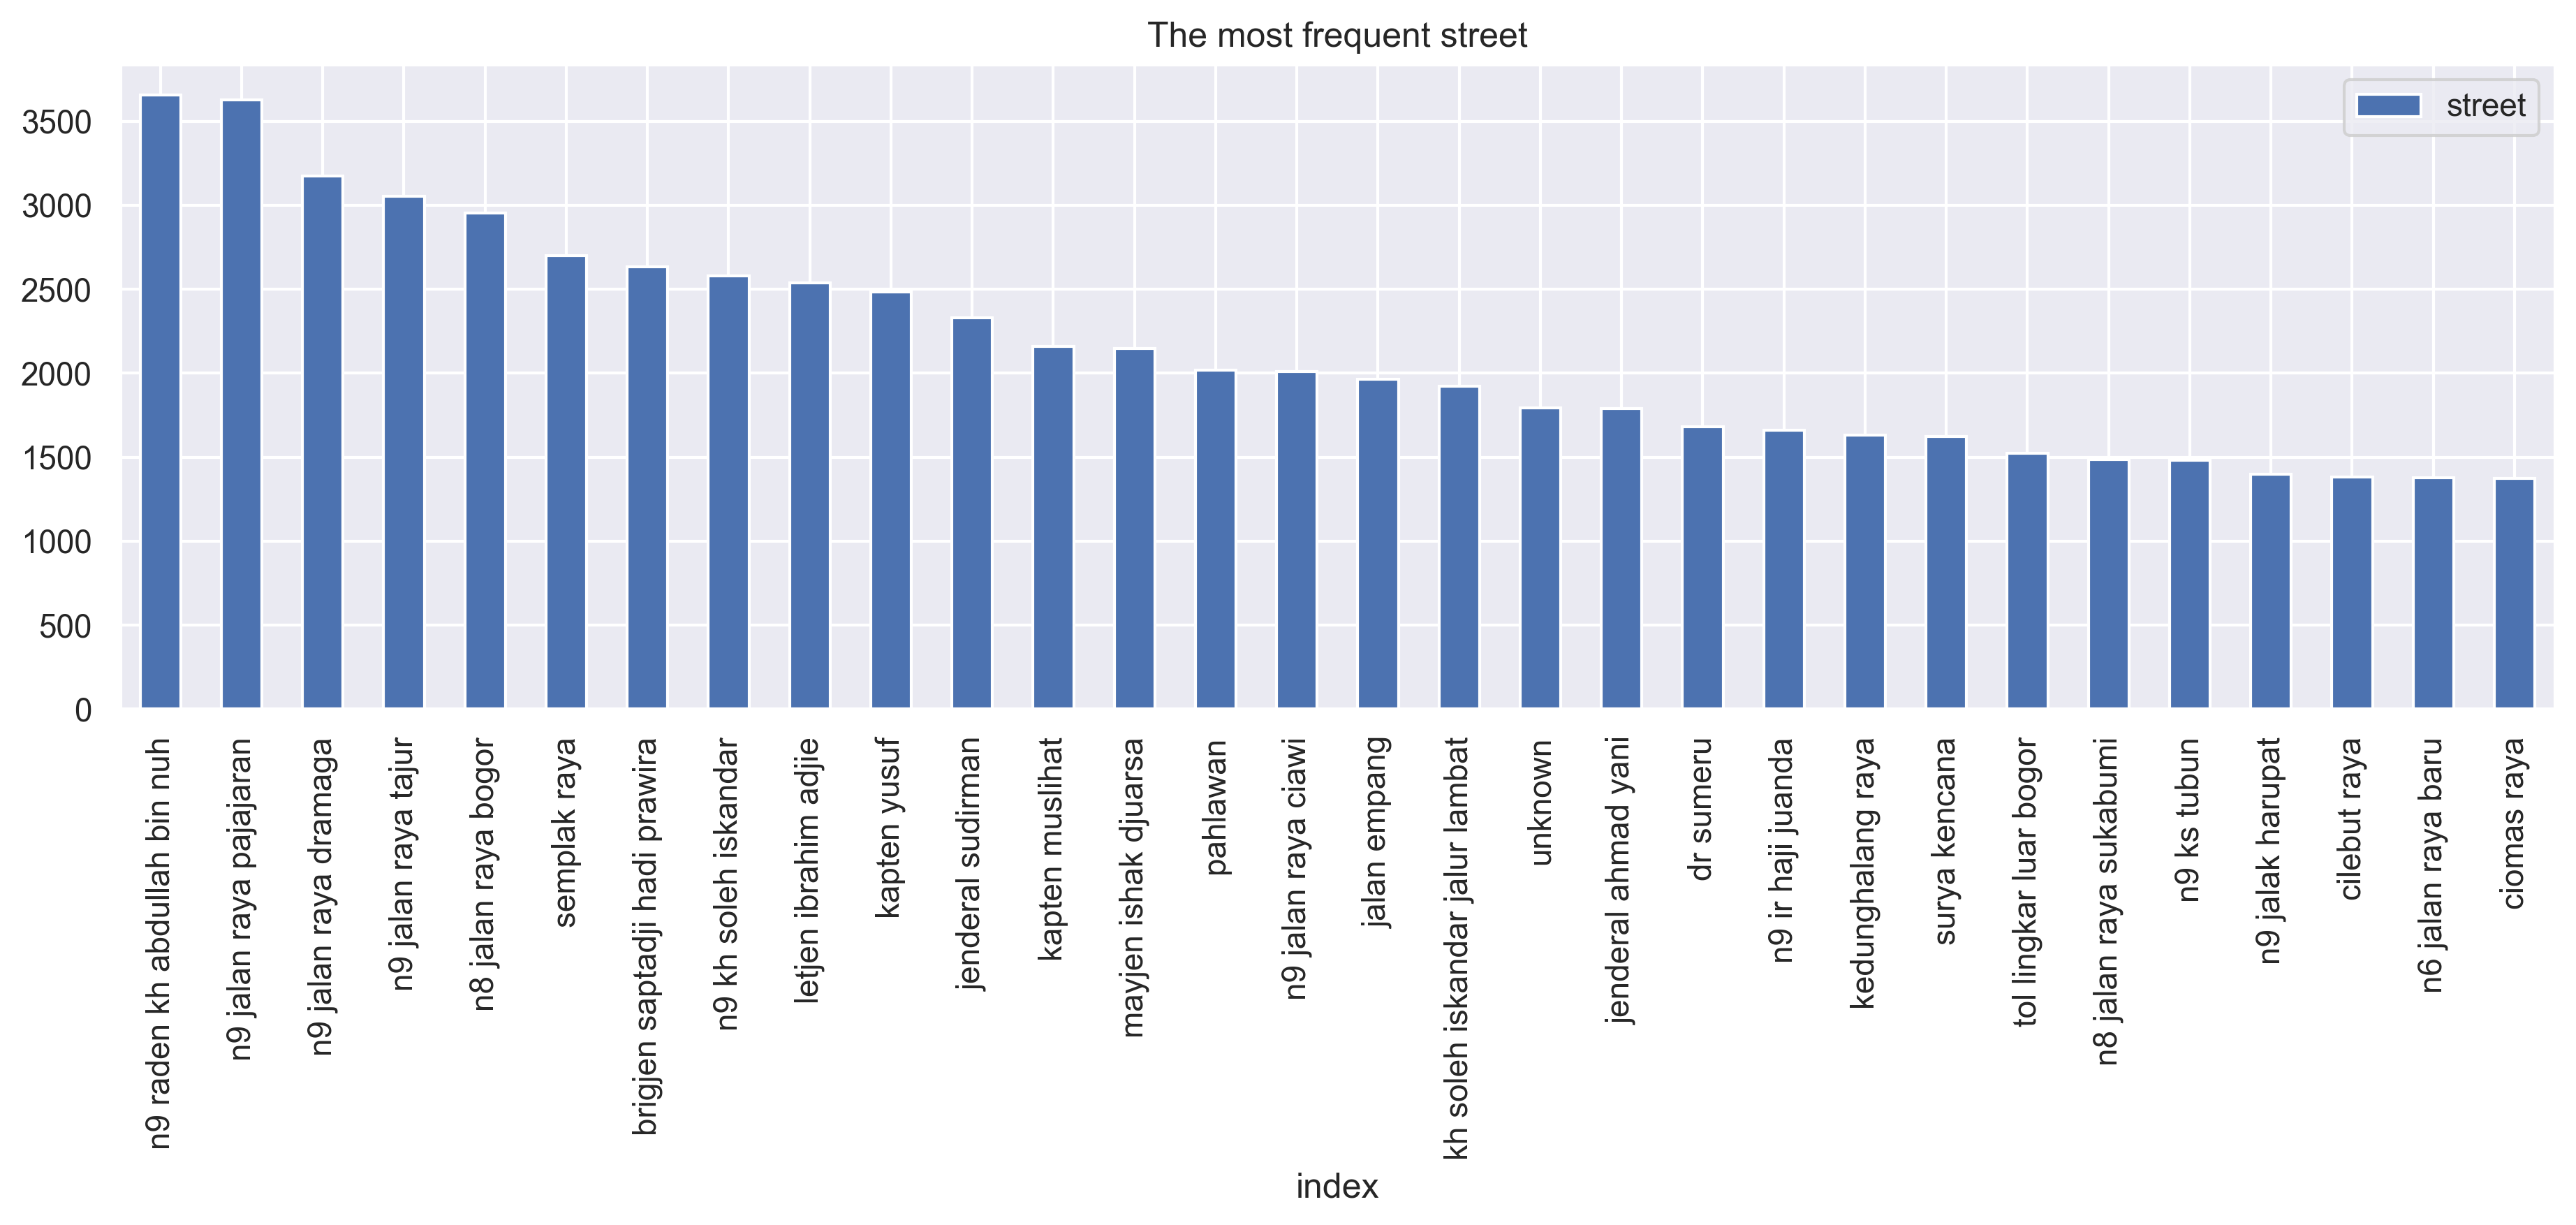

In [65]:
title = 'The most frequent street'

(
    jams.street
    .value_counts().reset_index().head(30)
    .plot(kind='bar', x='index', y='street', figsize=(15,4), title=title)    
)


Date & Time Distribution

In [79]:
jams['weekday'] = jams.date_time.apply(lambda x: x.weekday())
jams['month']  = jams.date_time.apply(lambda x: x.month)
jams['day'] = jams.date_time.apply(lambda x: x.day)


jams['is_weekday'] = np.vectorize(lambda x: 1 if x<5 else 0)(jams.weekday)
jams['hour'] = jams.date_time.apply(lambda x: x.hour)
jams['is_working_hour'] = np.vectorize(lambda x, y: 1 if (x==1) and (y>8) and (y<17) else 0)(jams.is_weekday, jams.hour)
jams['is_morning'] = np.vectorize(lambda x: 1 if (x<9) and (x>6) else 0)(jams.hour)
jams['is_lunch'] = np.vectorize(lambda x: 1 if (x<14) and (x>11) else 0)(jams.hour)
jams['is_late_afternoon'] = np.vectorize(lambda x: 1 if (x<19) and (x>16) else 0)(jams.hour)
jams['is_late_night'] = np.vectorize(lambda x: 1 if (x>22) and (x<2) else 0)(jams.hour)

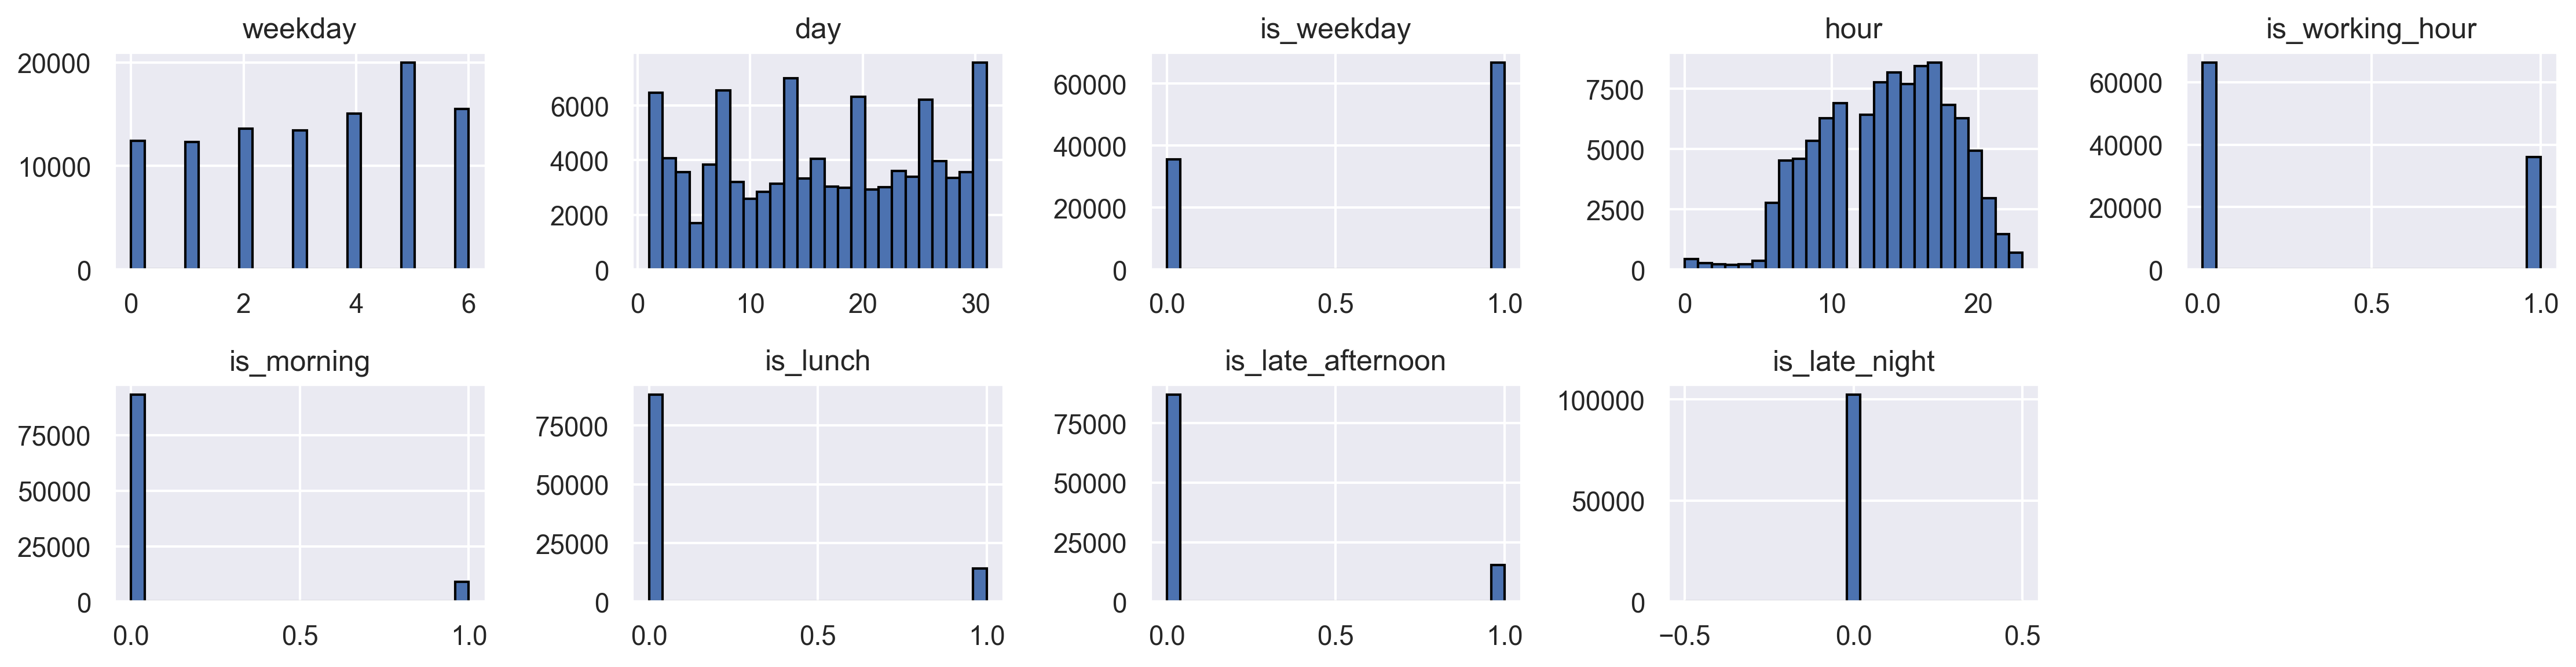

In [83]:
(
    jams
    .loc[:, ['weekday', 'day', 'is_weekday', 'hour', 'is_working_hour', 'is_morning', 'is_lunch', 'is_late_afternoon', 'is_late_night']]
    .hist(bins=25, figsize=(15,4), layout=(-1,5), edgecolor="black")
)

plt.tight_layout();

### Bivariate

In [84]:
jams.head()

street  median_length  median_delay  \
0                        pahlawan       784.0000       62.0000   
1          tol lingkar luar bogor      1314.0000       63.0000   
2  kh soleh iskandar jalur lambat       167.0000       -1.0000   
3          n8 jalan raya sukabumi       379.0000      117.5000   
4          tol lingkar luar bogor      2438.0000       87.0000   

   median_speed_kmh  total_records        id       date  median_level  \
0           20.3100              4  33469021 2022-07-06        2.0000   
1           37.7100              2  33469023 2022-07-06        2.0000   
2            0.0000             61  33469019 2022-07-06        5.0000   
3            8.5950             10  33469020 2022-07-06        3.0000   
4           42.2700              2  33469022 2022-07-06        1.0000   

                                            geometry  date_time  weekday  \
0  MULTILINESTRING ((106.797269 -6.608899, 106.79... 2022-07-06        2   
1  LINESTRING (106.787027 -6.559782, 106.787701 -... 2022-07-06        2   
2  MULTILINESTRING ((106.800516 -6.561997, 106.80... 2022-07-06        2   
3  MULTILINESTRING ((106.845486 -6.6594, 106.8454... 2022-07-06        2   
4  LINESTRING (106.787027 -6.559782, 106.787701 -... 2022-07-06        2   

   month  day  is_weekday  hour  is_working_hour  is_morning  is_lunch  \
0      7    6           1     0                0           0         0   
1      7    6           1     0                0           0         0   
2      7    6           1     0                0           0         0   
3      7    6           1     0                0           0         0   
4      7    6           1     0                0           0         0   

   is_late_afternoon  is_late_night  
0                  0              0  
1                  0              0  
2                  0              0  
3                  0              0  
4                  0              0

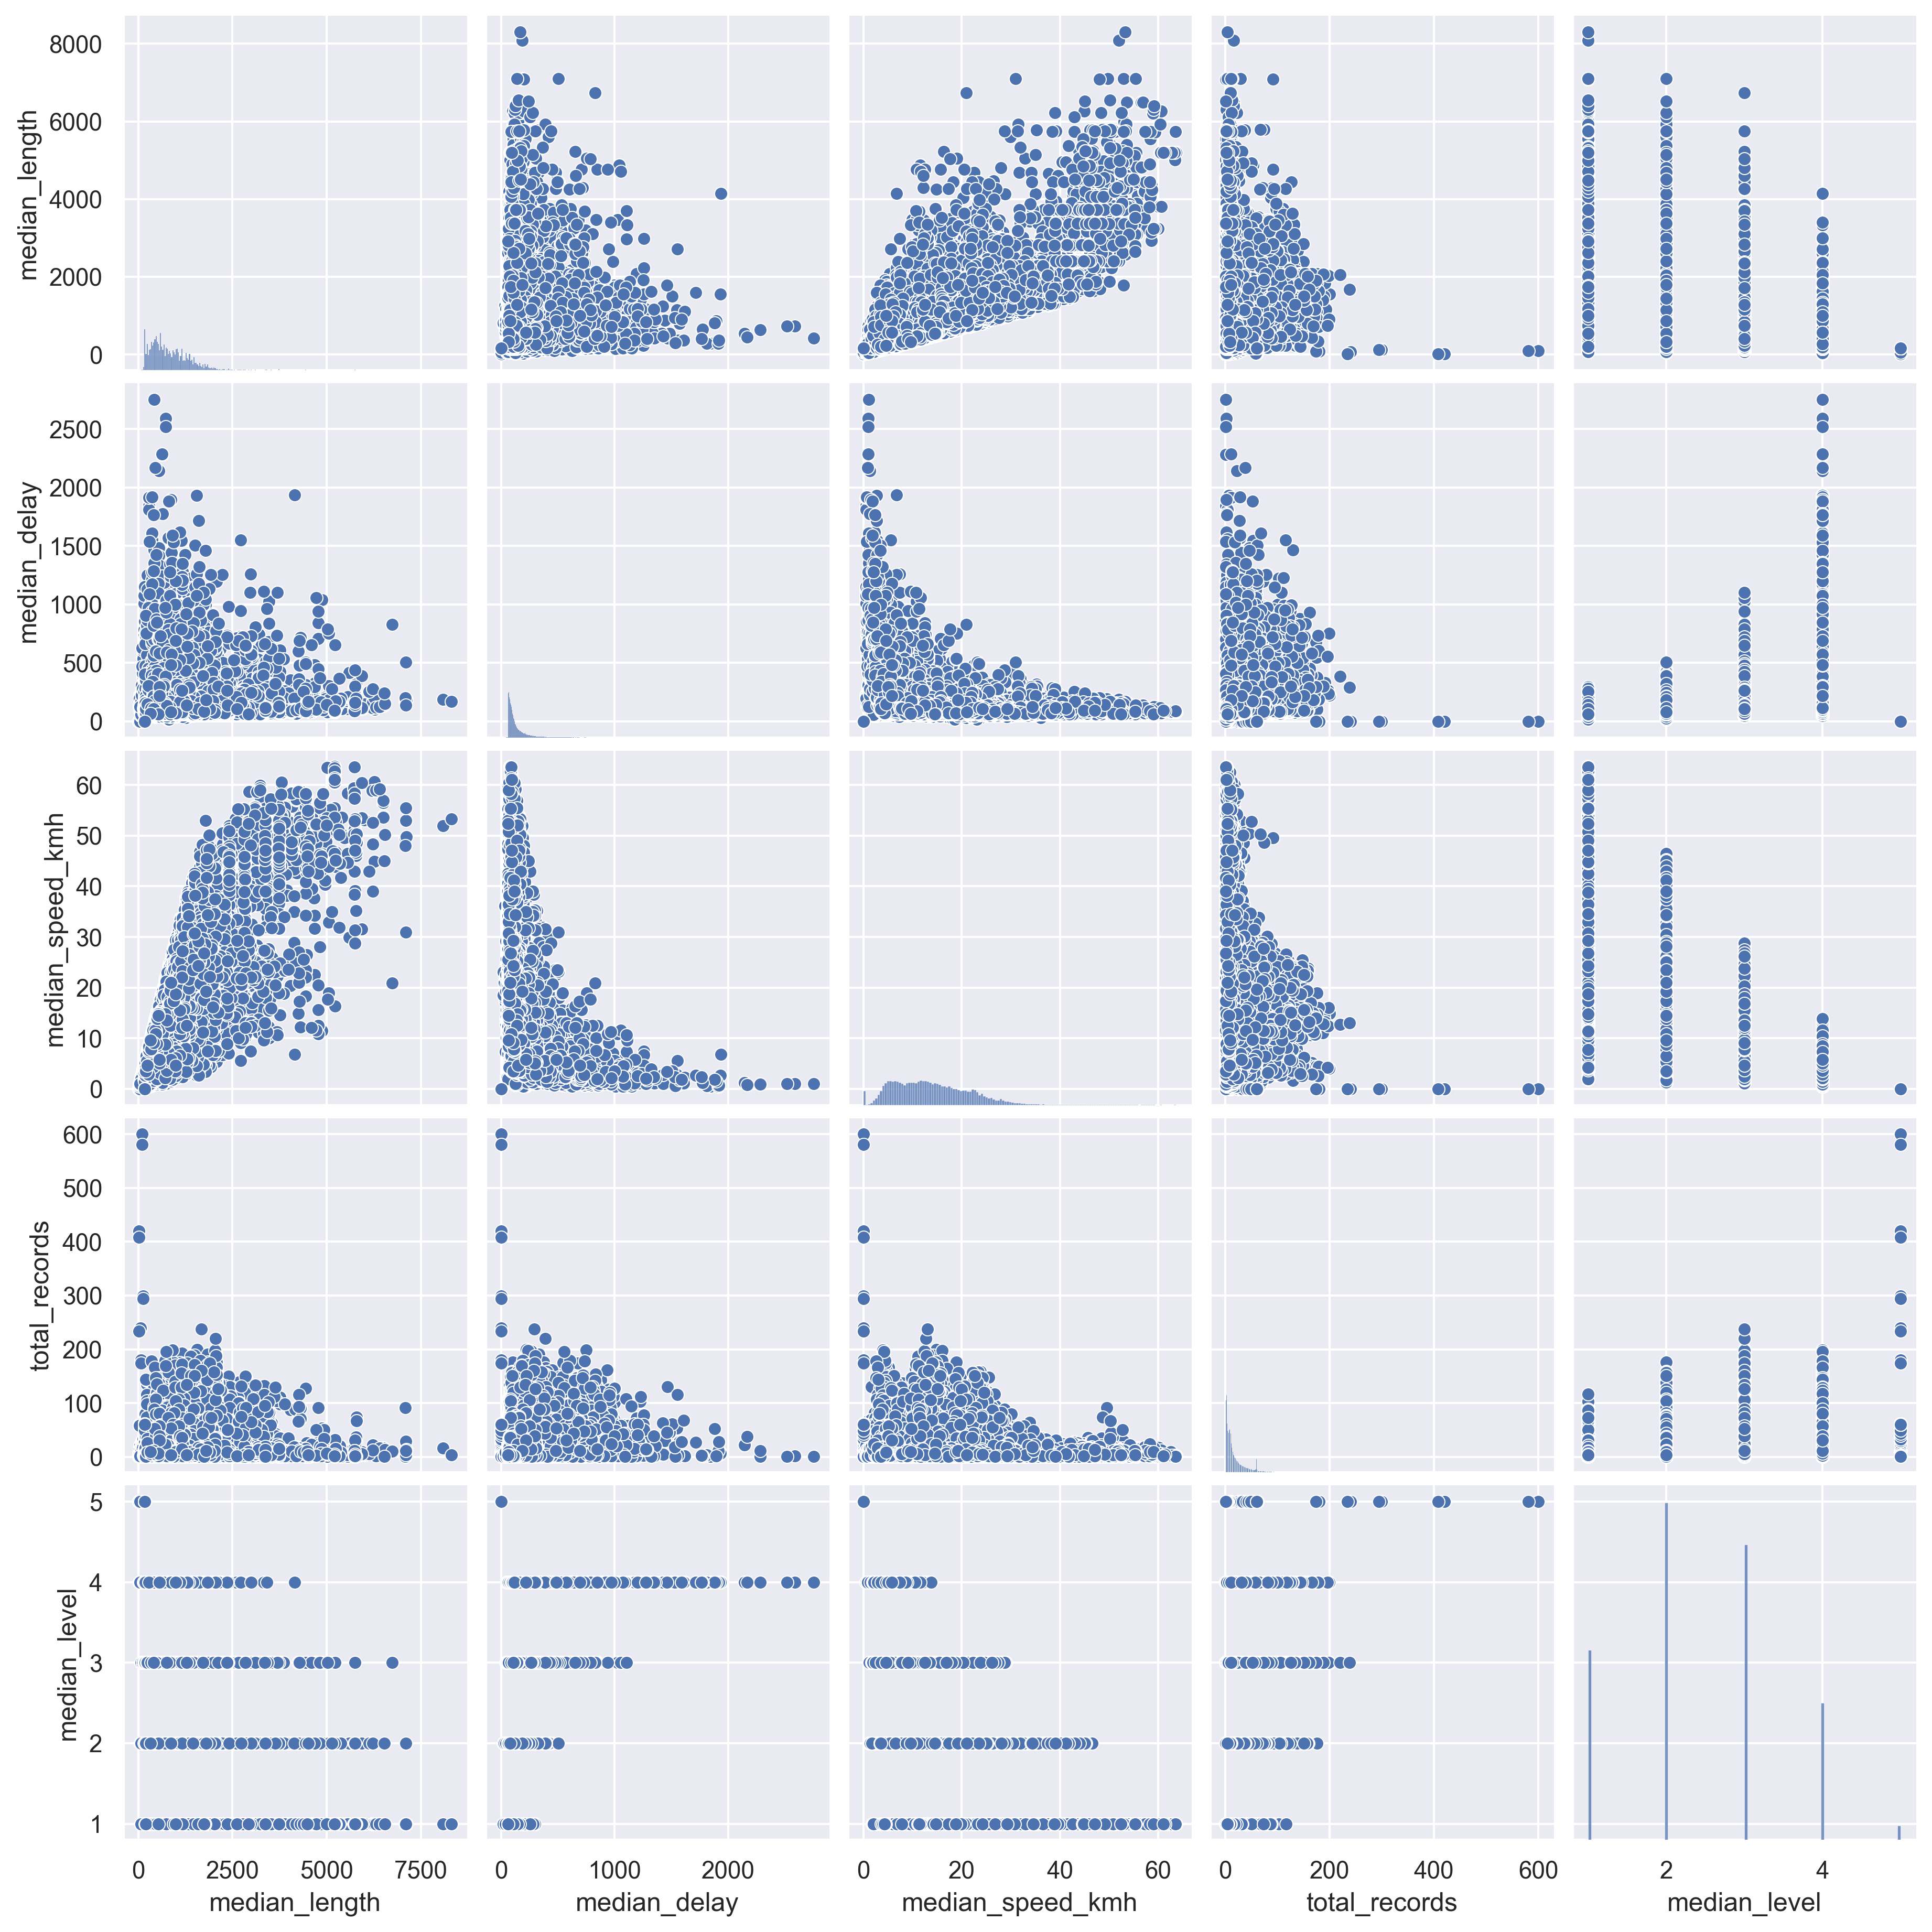

In [89]:
sns.pairplot(jams.loc[:, ['median_length', 'median_delay', 'median_speed_kmh', 'total_records', 'median_level']])
plt.show()

In [101]:
def create_violin_sub(categorical):
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    fig.suptitle('Pokemon Stats by Generation')

    sns.violinplot(ax=axes[0, 0], data=jams, x=categorical, y='median_length')
    sns.violinplot(ax=axes[0, 1], data=jams, x=categorical, y='median_delay')
    sns.violinplot(ax=axes[0, 2], data=jams, x=categorical, y='median_speed_kmh')
    sns.violinplot(ax=axes[1, 0], data=jams, x=categorical, y='total_records')
    sns.violinplot(ax=axes[1, 1], data=jams, x=categorical, y='median_level')
    plt.show()
    
def groupby_category(categorical):
    return (
        jams
        .loc[:, ['median_length', 'median_delay', 'median_speed_kmh', 'total_records', 'median_level', categorical]]
        .groupby(categorical)
        .agg(['median', 'std'])
    )
    

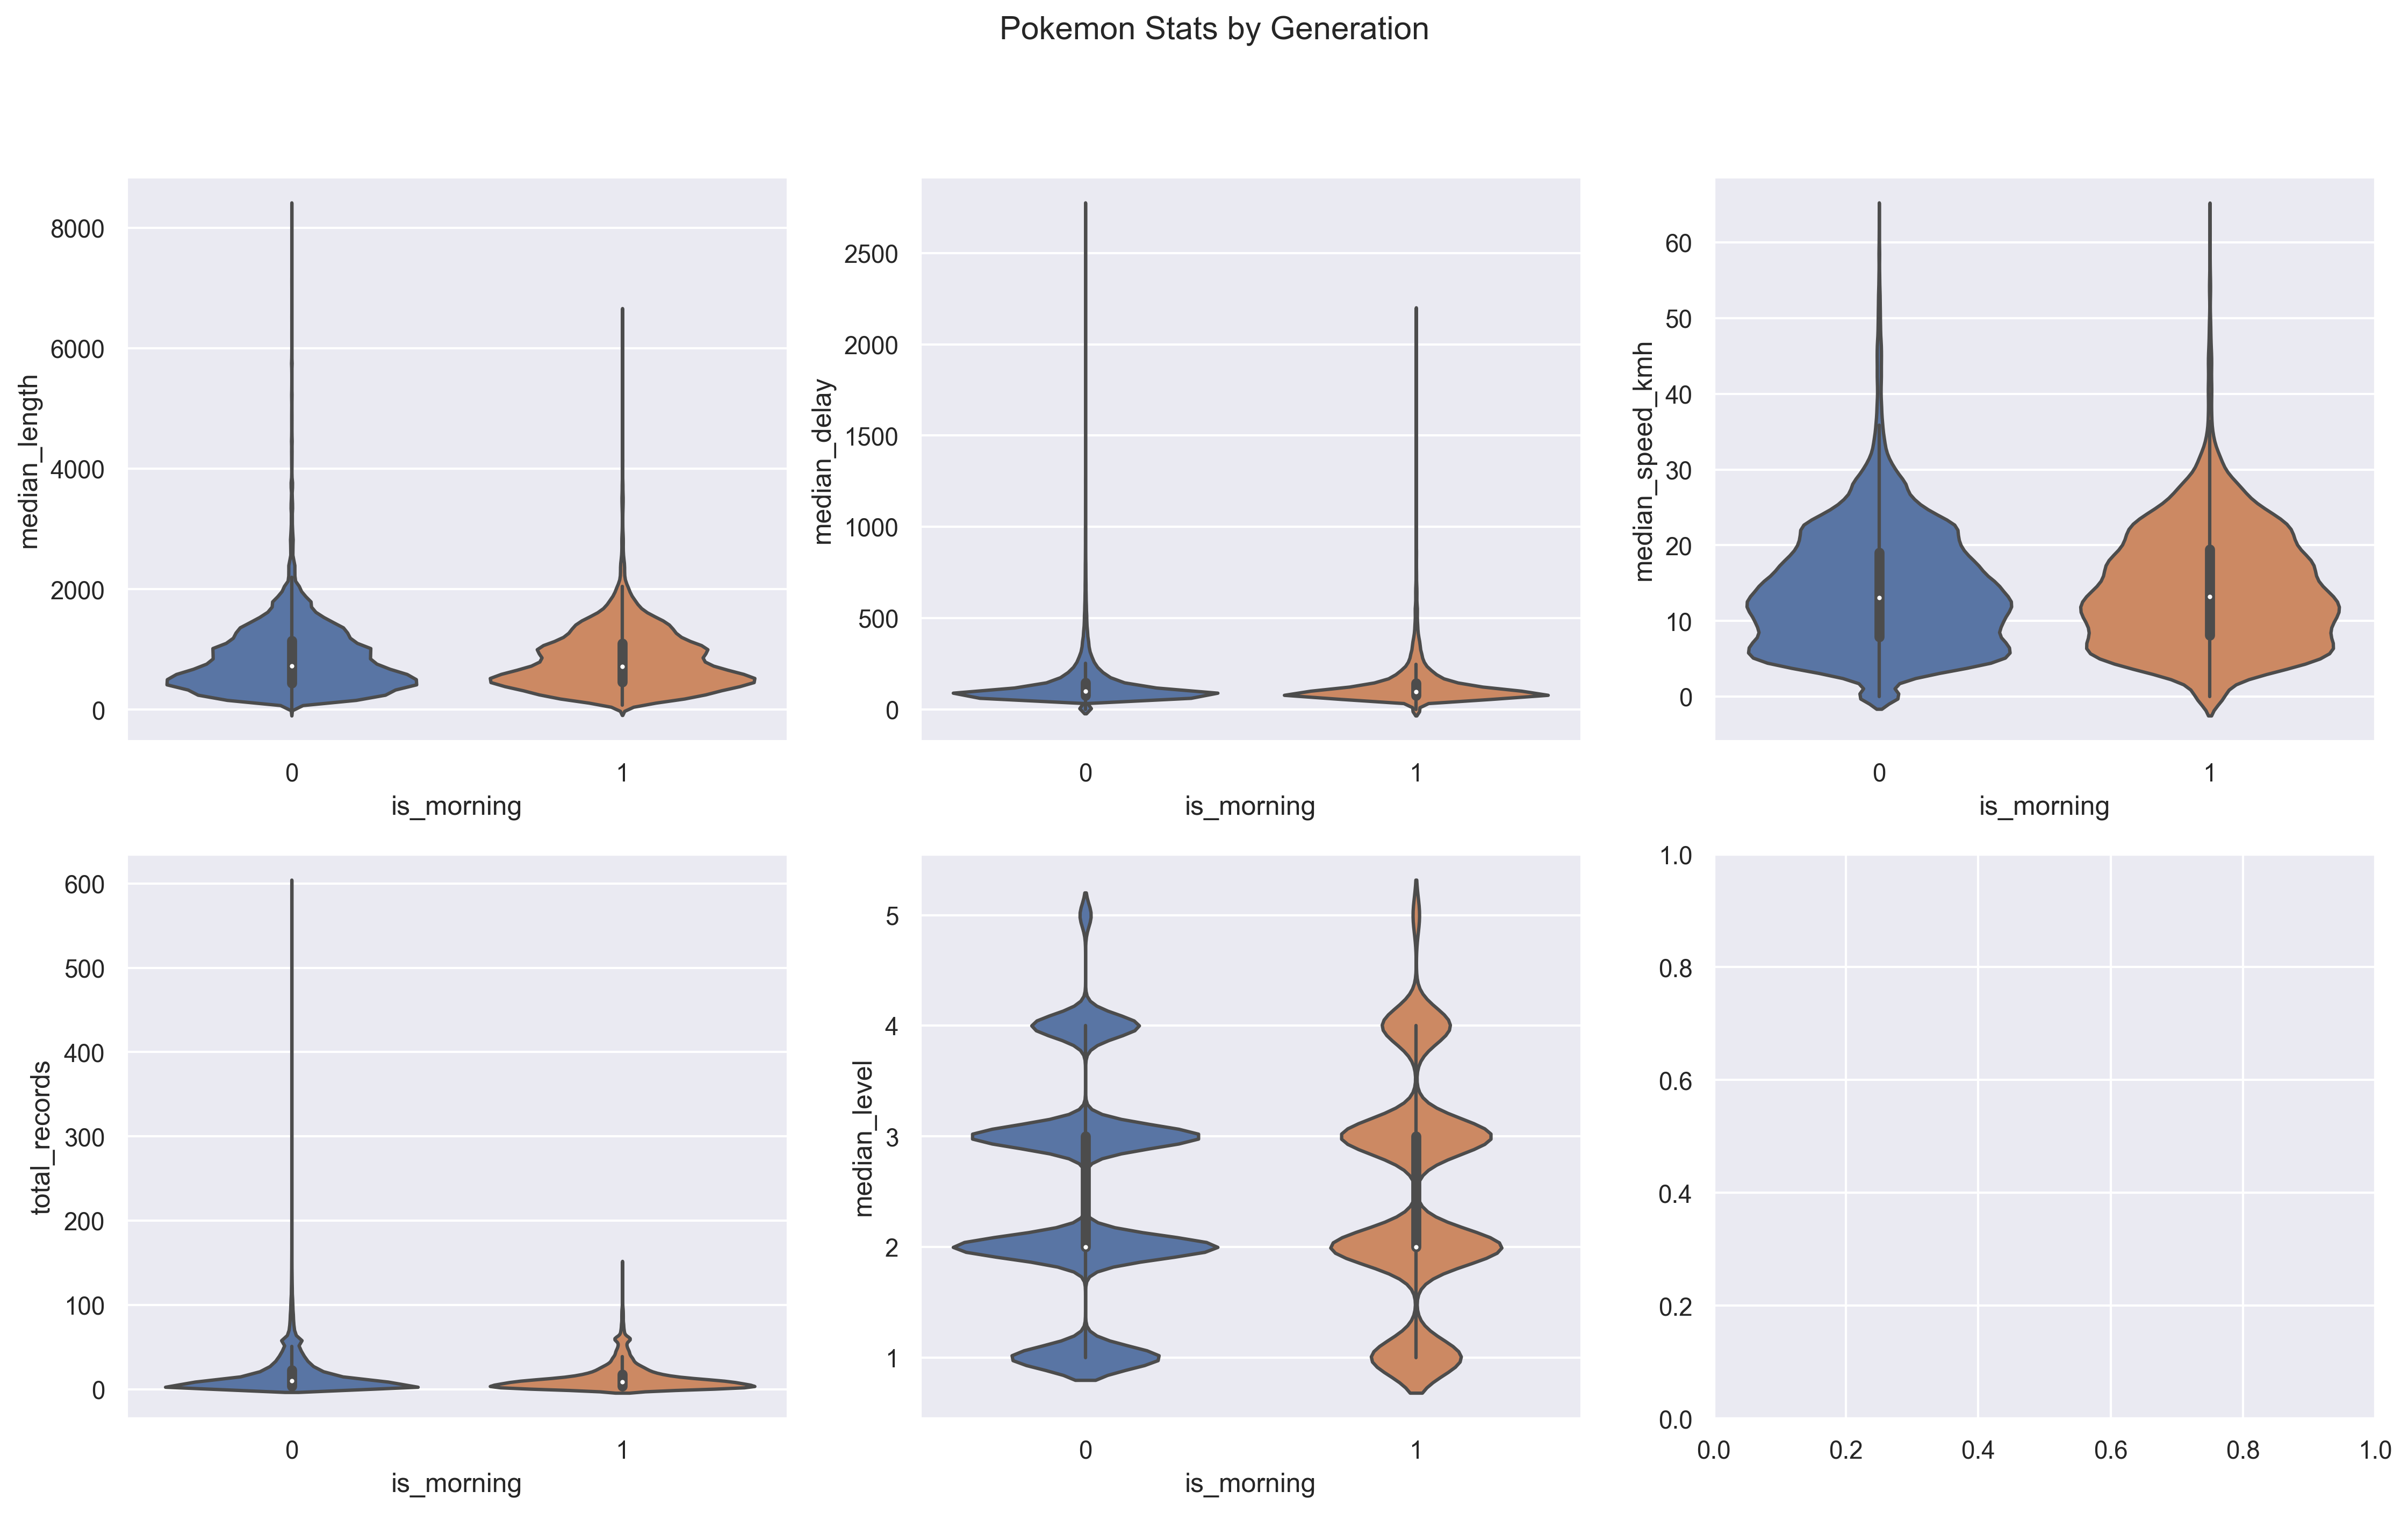

In [95]:
create_violin_sub('is_morning')

In [102]:
groupby_category('is_morning')

median_length          median_delay          median_speed_kmh  \
                  median      std       median      std           median   
is_morning                                                                 
0               729.0000 553.6804      98.0000 109.8620          13.0400   
1               714.2500 508.8449      97.5000 104.9057          13.2425   

                  total_records         median_level         
              std        median     std       median    std  
is_morning                                                   
0          7.9971            10 21.0611       2.0000 1.0033  
1          7.7545             9 15.8999       2.0000 0.9888

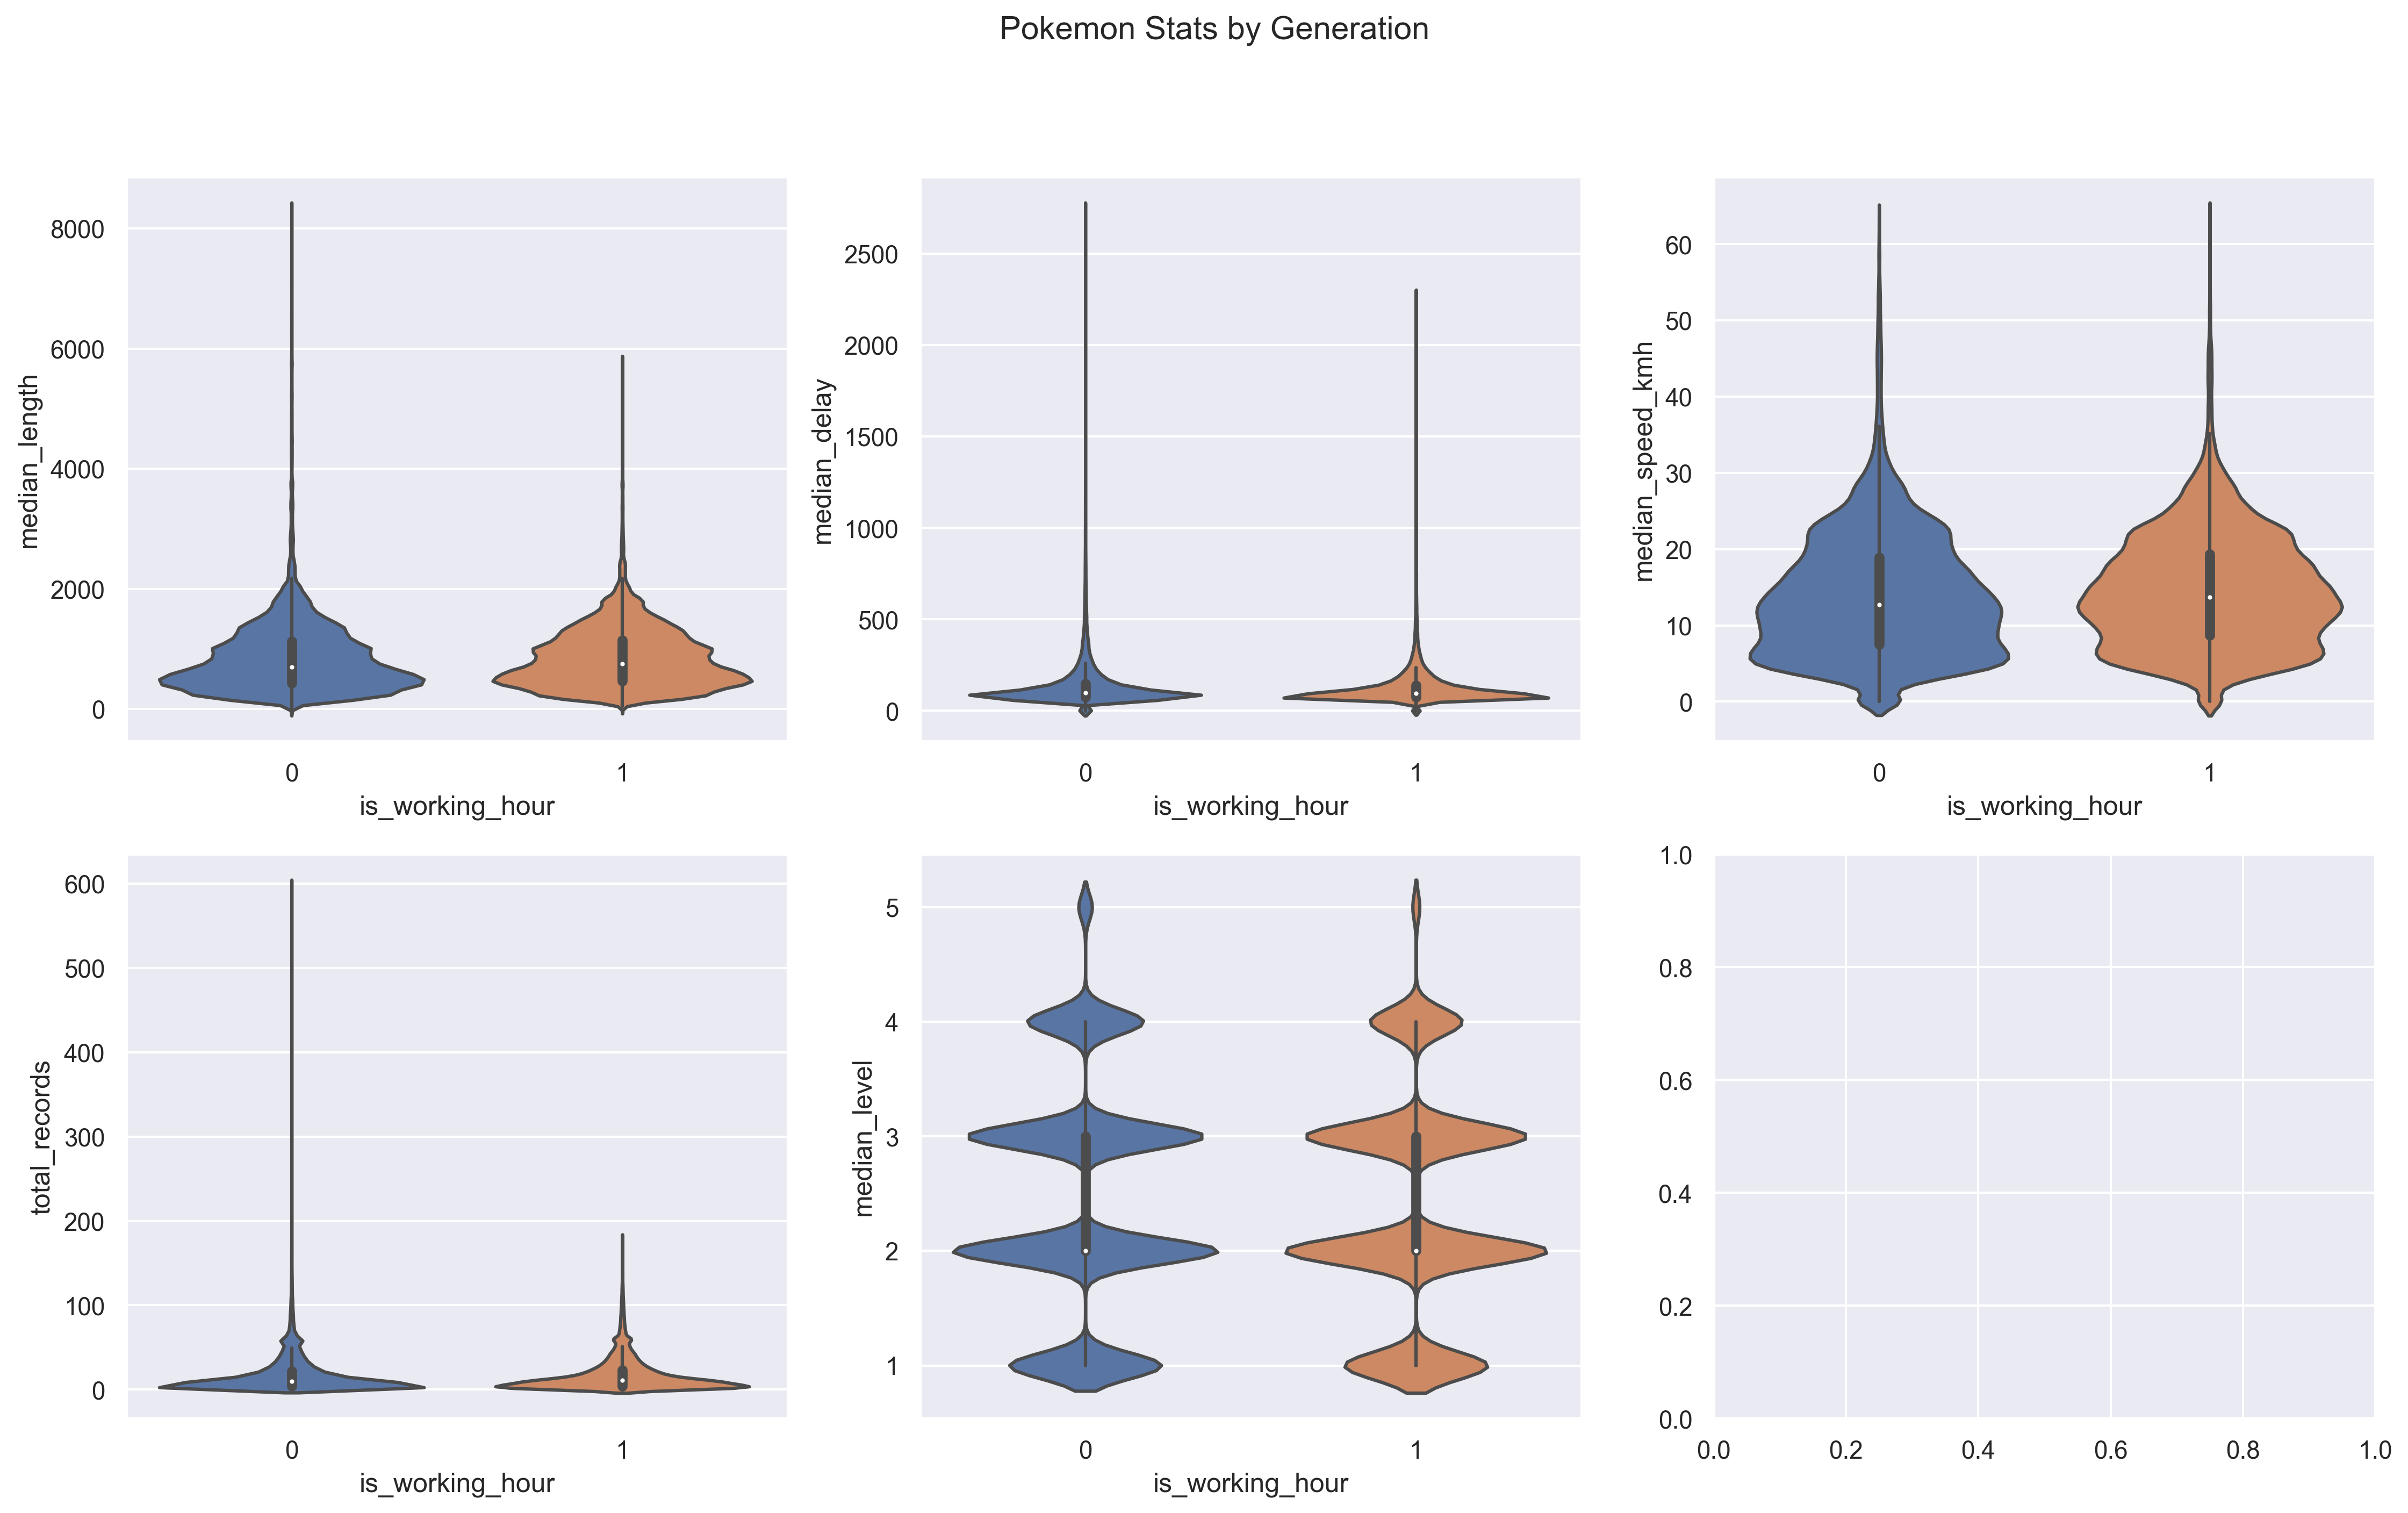

In [100]:
create_violin_sub('is_working_hour')

In [103]:
groupby_category('is_working_hour')

median_length          median_delay          median_speed_kmh  \
                       median      std       median      std           median   
is_working_hour                                                                 
0                    702.0000 575.3123      98.5000 118.7826          12.6900   
1                    756.0000 499.6225      96.5000  89.2116          13.7200   

                       total_records         median_level         
                   std        median     std       median    std  
is_working_hour                                                   
0               8.2066            10 20.9863       2.0000 1.0178  
1               7.5165            11 20.1099       2.0000 0.9709

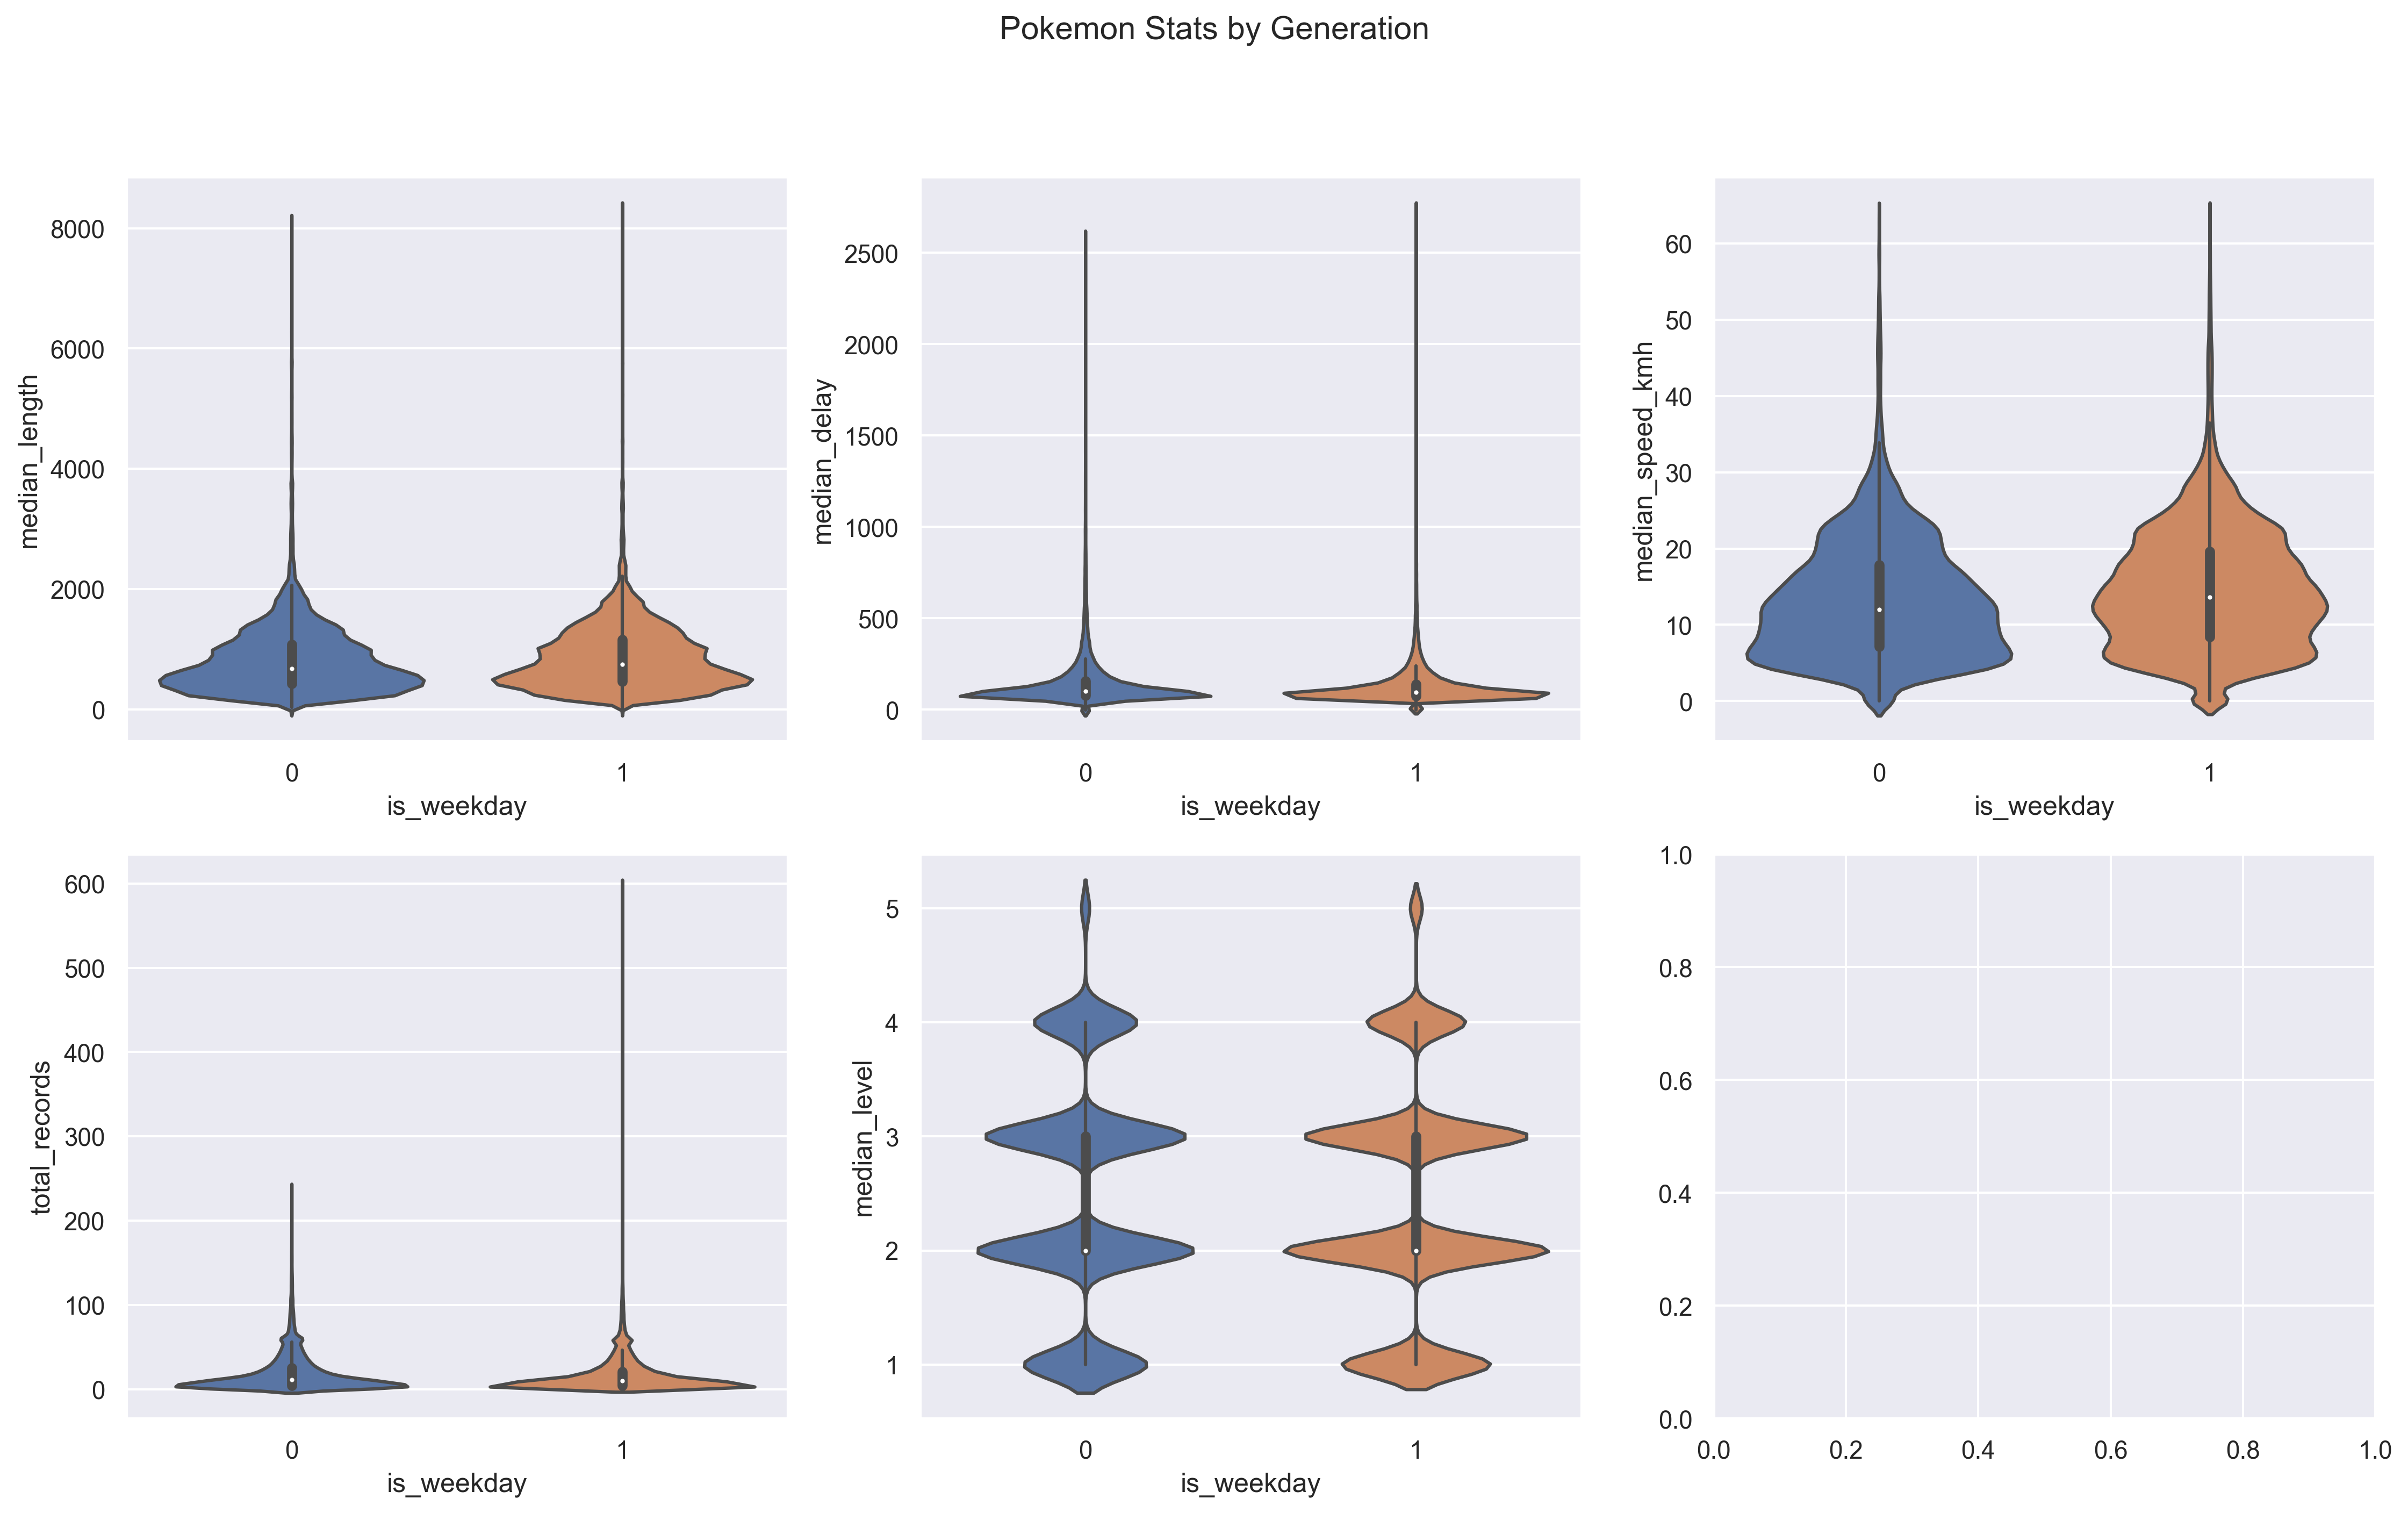

In [96]:
create_violin_sub('is_weekday')

In [104]:
groupby_category('is_weekday')

median_length          median_delay          median_speed_kmh  \
                  median      std       median      std           median   
is_weekday                                                                 
0               680.0000 550.4651     101.0000 129.4972          11.9900   
1               747.0000 548.9646      96.0000  96.5638          13.6500   

                  total_records         median_level         
              std        median     std       median    std  
is_weekday                                                   
0          7.8047            11 22.1675       2.0000 1.0074  
1          8.0266            10 19.8007       2.0000 0.9986

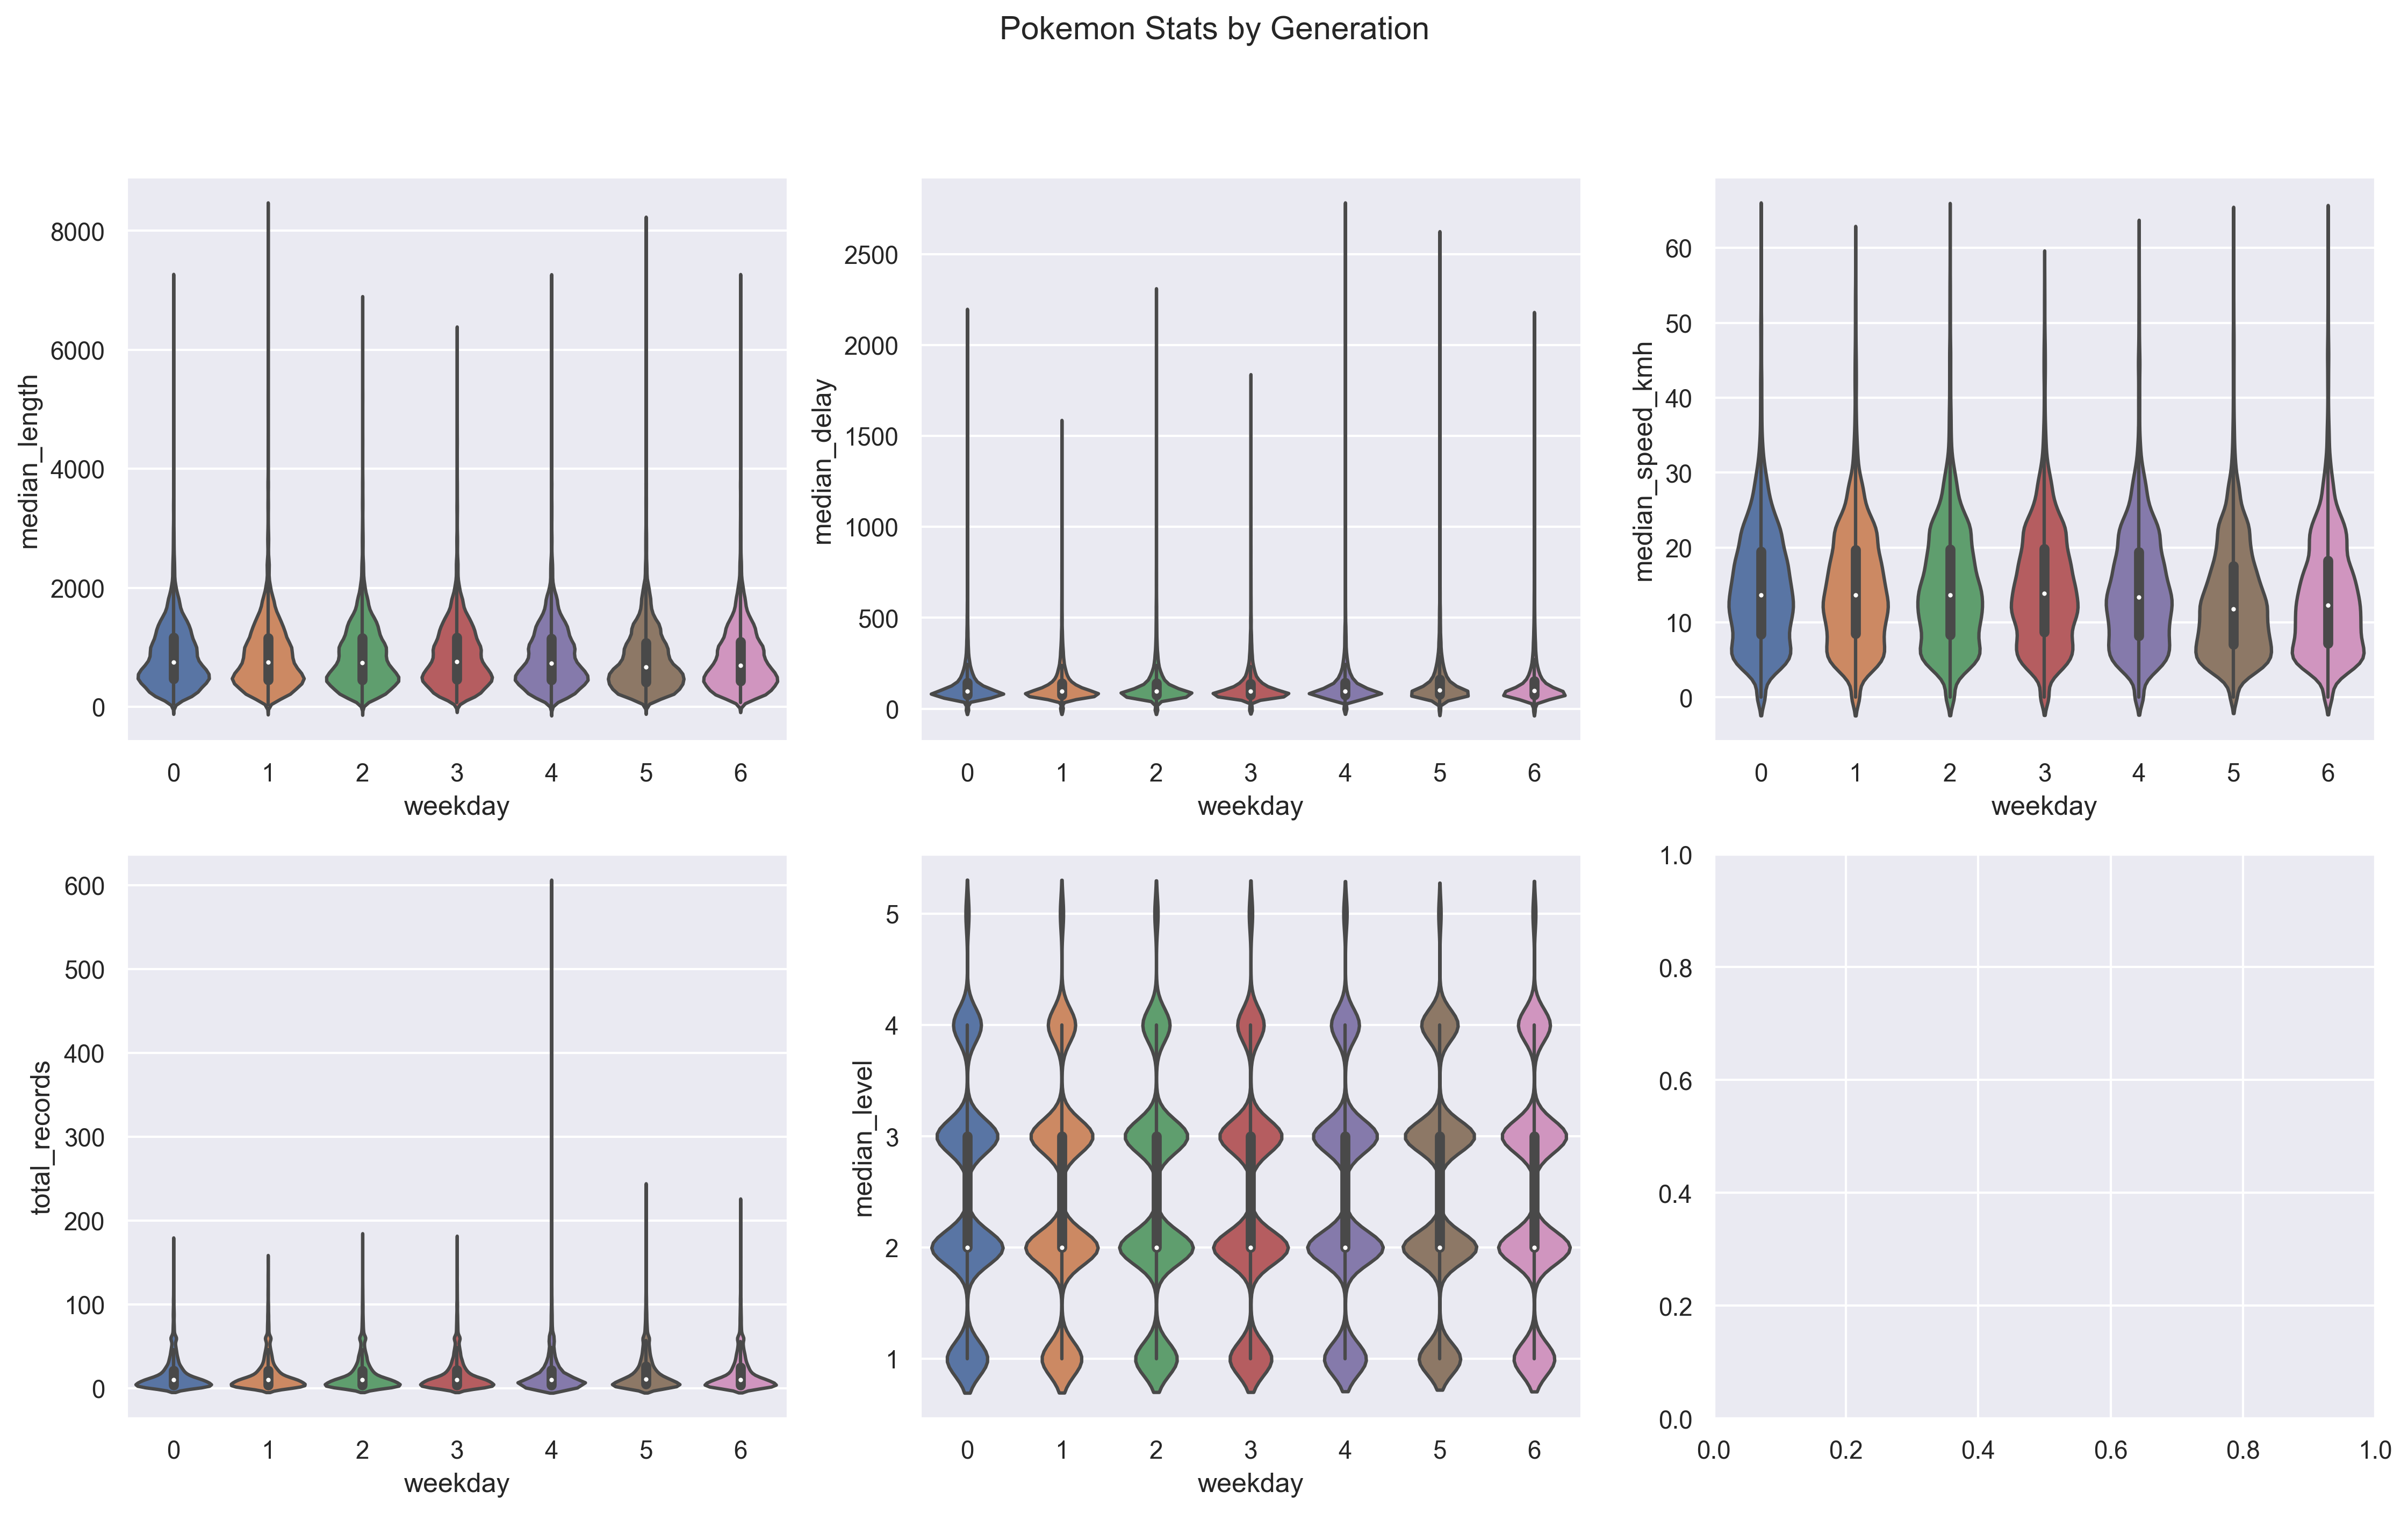

In [97]:
create_violin_sub('weekday')

In [105]:
groupby_category('weekday')

median_length          median_delay          median_speed_kmh         \
               median      std       median      std           median    std   
weekday                                                                        
0            747.0000 548.5702      97.0000  98.5296          13.6600 8.0019   
1            752.0000 545.2594      96.0000  96.7840          13.6725 8.0358   
2            743.0000 556.9838      95.5000  98.9500          13.6300 8.1088   
3            756.0000 540.2434      95.0000  90.7023          13.8800 7.9507   
4            733.0000 552.6956      97.0000  97.5746          13.4100 8.0298   
5            668.0000 544.2174     103.0000 129.8144          11.7700 7.7121   
6            700.0000 558.3133      99.0000 129.0625          12.2800 7.9160   

        total_records         median_level         
               median     std       median    std  
weekday                                            
0                  10 18.7687       2.0000 1.0039  
1                  10 18.9046       2.0000 0.9969  
2                  10 19.3348       2.0000 0.9991  
3                  10 19.3036       2.0000 0.9956  
4                  10 22.0602       2.0000 0.9977  
5                  11 22.8601       2.0000 1.0059  
6                  10 21.2185       2.0000 1.0093

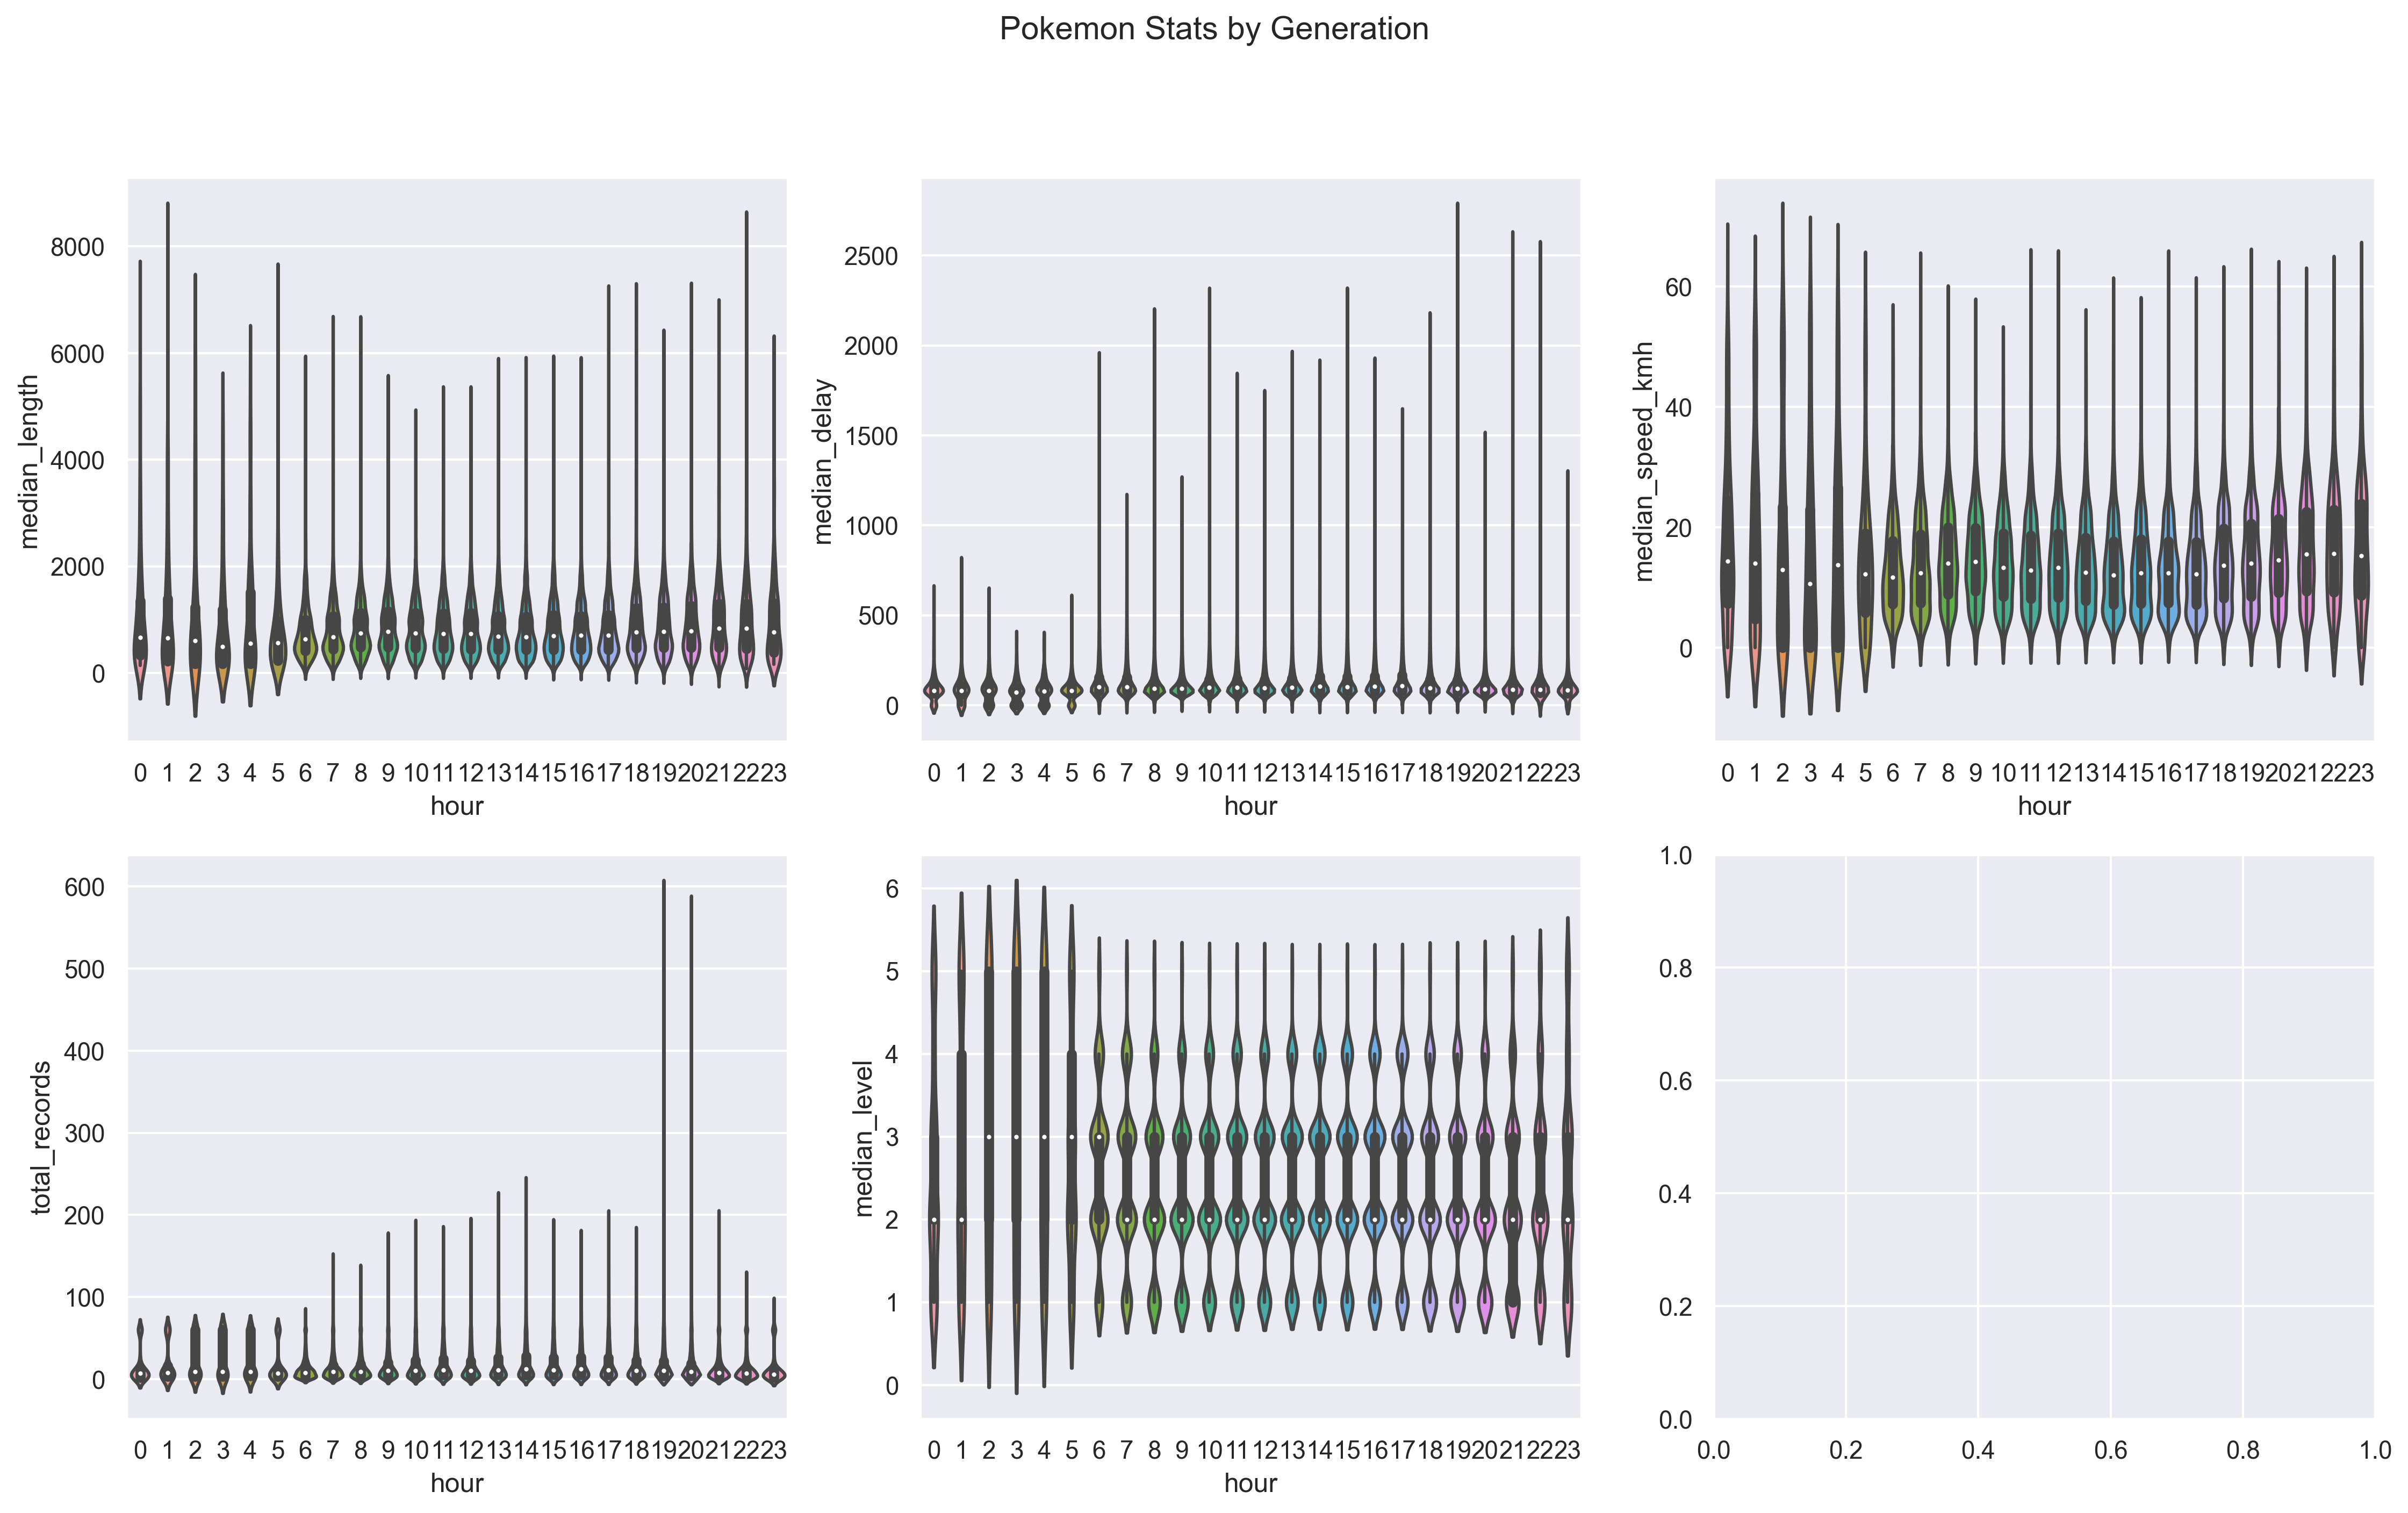

In [99]:
create_violin_sub('hour')

In [106]:
groupby_category('hour')

median_length           median_delay          median_speed_kmh          \
            median       std       median      std           median     std   
hour                                                                          
0         666.0000 1041.1603      82.0000  70.3584          14.4000 13.6668   
1         656.0000 1130.7834      80.0000  83.5777          14.0100 15.0498   
2         602.0000 1403.3968      81.2500  72.9036          12.9600 16.6208   
3         496.5000 1002.5414      71.2500  64.0046          10.6125 15.5807   
4         549.0000 1147.6059      78.0000  64.2150          13.7300 15.3213   
5         561.0000  929.3253      82.0000  63.4959          12.2100 11.7938   
6         637.0000  504.0631     103.0000 106.1521          11.7375  7.8093   
7         676.5000  513.0132     102.0000 108.7525          12.4250  7.8062   
8         747.0000  503.9417      93.5000 100.3649          14.0200  7.6644   
9         776.0000  489.2153      93.0000  87.6547          14.2600  7.4208   
10        749.0000  475.3754      97.5000  99.3238          13.3400  7.3406   
11        735.0000  500.6841      99.0000 103.9048          12.8850  7.4388   
12        732.0000  493.6035      95.5000 103.3463          13.2700  7.4178   
13        685.0000  493.3237     100.0000 108.4237          12.5400  7.4506   
14        674.0000  505.1762     104.0000 120.1904          12.0250  7.5163   
15        694.0000  519.7419     103.0000 117.4057          12.4000  7.5354   
16        702.0000  502.5038     105.0000 113.3809          12.3900  7.3140   
17        700.0000  528.8267     106.5000 119.9419          12.2000  7.4874   
18        765.0000  588.9033      96.0000 117.3803          13.6550  8.0681   
19        774.0000  599.9705      94.0000 109.3977          14.0500  8.3727   
20        782.0000  616.5574      91.0000  97.0083          14.5500  8.5138   
21        840.0000  670.0410      87.5000 109.8532          15.5300  9.2315   
22        834.5000  739.4112      87.0000 125.7696          15.6300  9.9723   
23        770.0000  733.0042      83.5000  84.3530          15.3000 11.1098   

     total_records         median_level         
            median     std       median    std  
hour                                            
0                7 19.4480       2.0000 1.3228  
1                8 22.5325       2.0000 1.4536  
2                9 24.5491       3.0000 1.5019  
3                9 25.8765       3.0000 1.5607  
4                9 24.2282       3.0000 1.4932  
5                7 20.5563       3.0000 1.2918  
6                8 12.4885       3.0000 0.9811  
7                9 15.5659       2.0000 0.9907  
8                9 16.2215       2.0000 0.9816  
9               10 17.5693       2.0000 0.9685  
10              10 19.3214       2.0000 0.9731  
11              11 20.6976       2.0000 0.9749  
12              10 20.1473       2.0000 0.9720  
13              11 22.0614       2.0000 0.9735  
14              12 23.2821       2.0000 0.9842  
15              11 22.4184       2.0000 0.9891  
16              12 22.5207       2.0000 0.9834  
17              11 22.3189       2.0000 0.9967  
18              10 20.3900       2.0000 1.0075  
19              10 22.3988       2.0000 1.0020  
20               9 20.9314       2.0000 0.9942  
21               8 15.8439       2.0000 1.0333  
22               7 14.3243       2.0000 1.0691  
23               6 16.3711       2.0000 1.1966

Pairwise Correlation

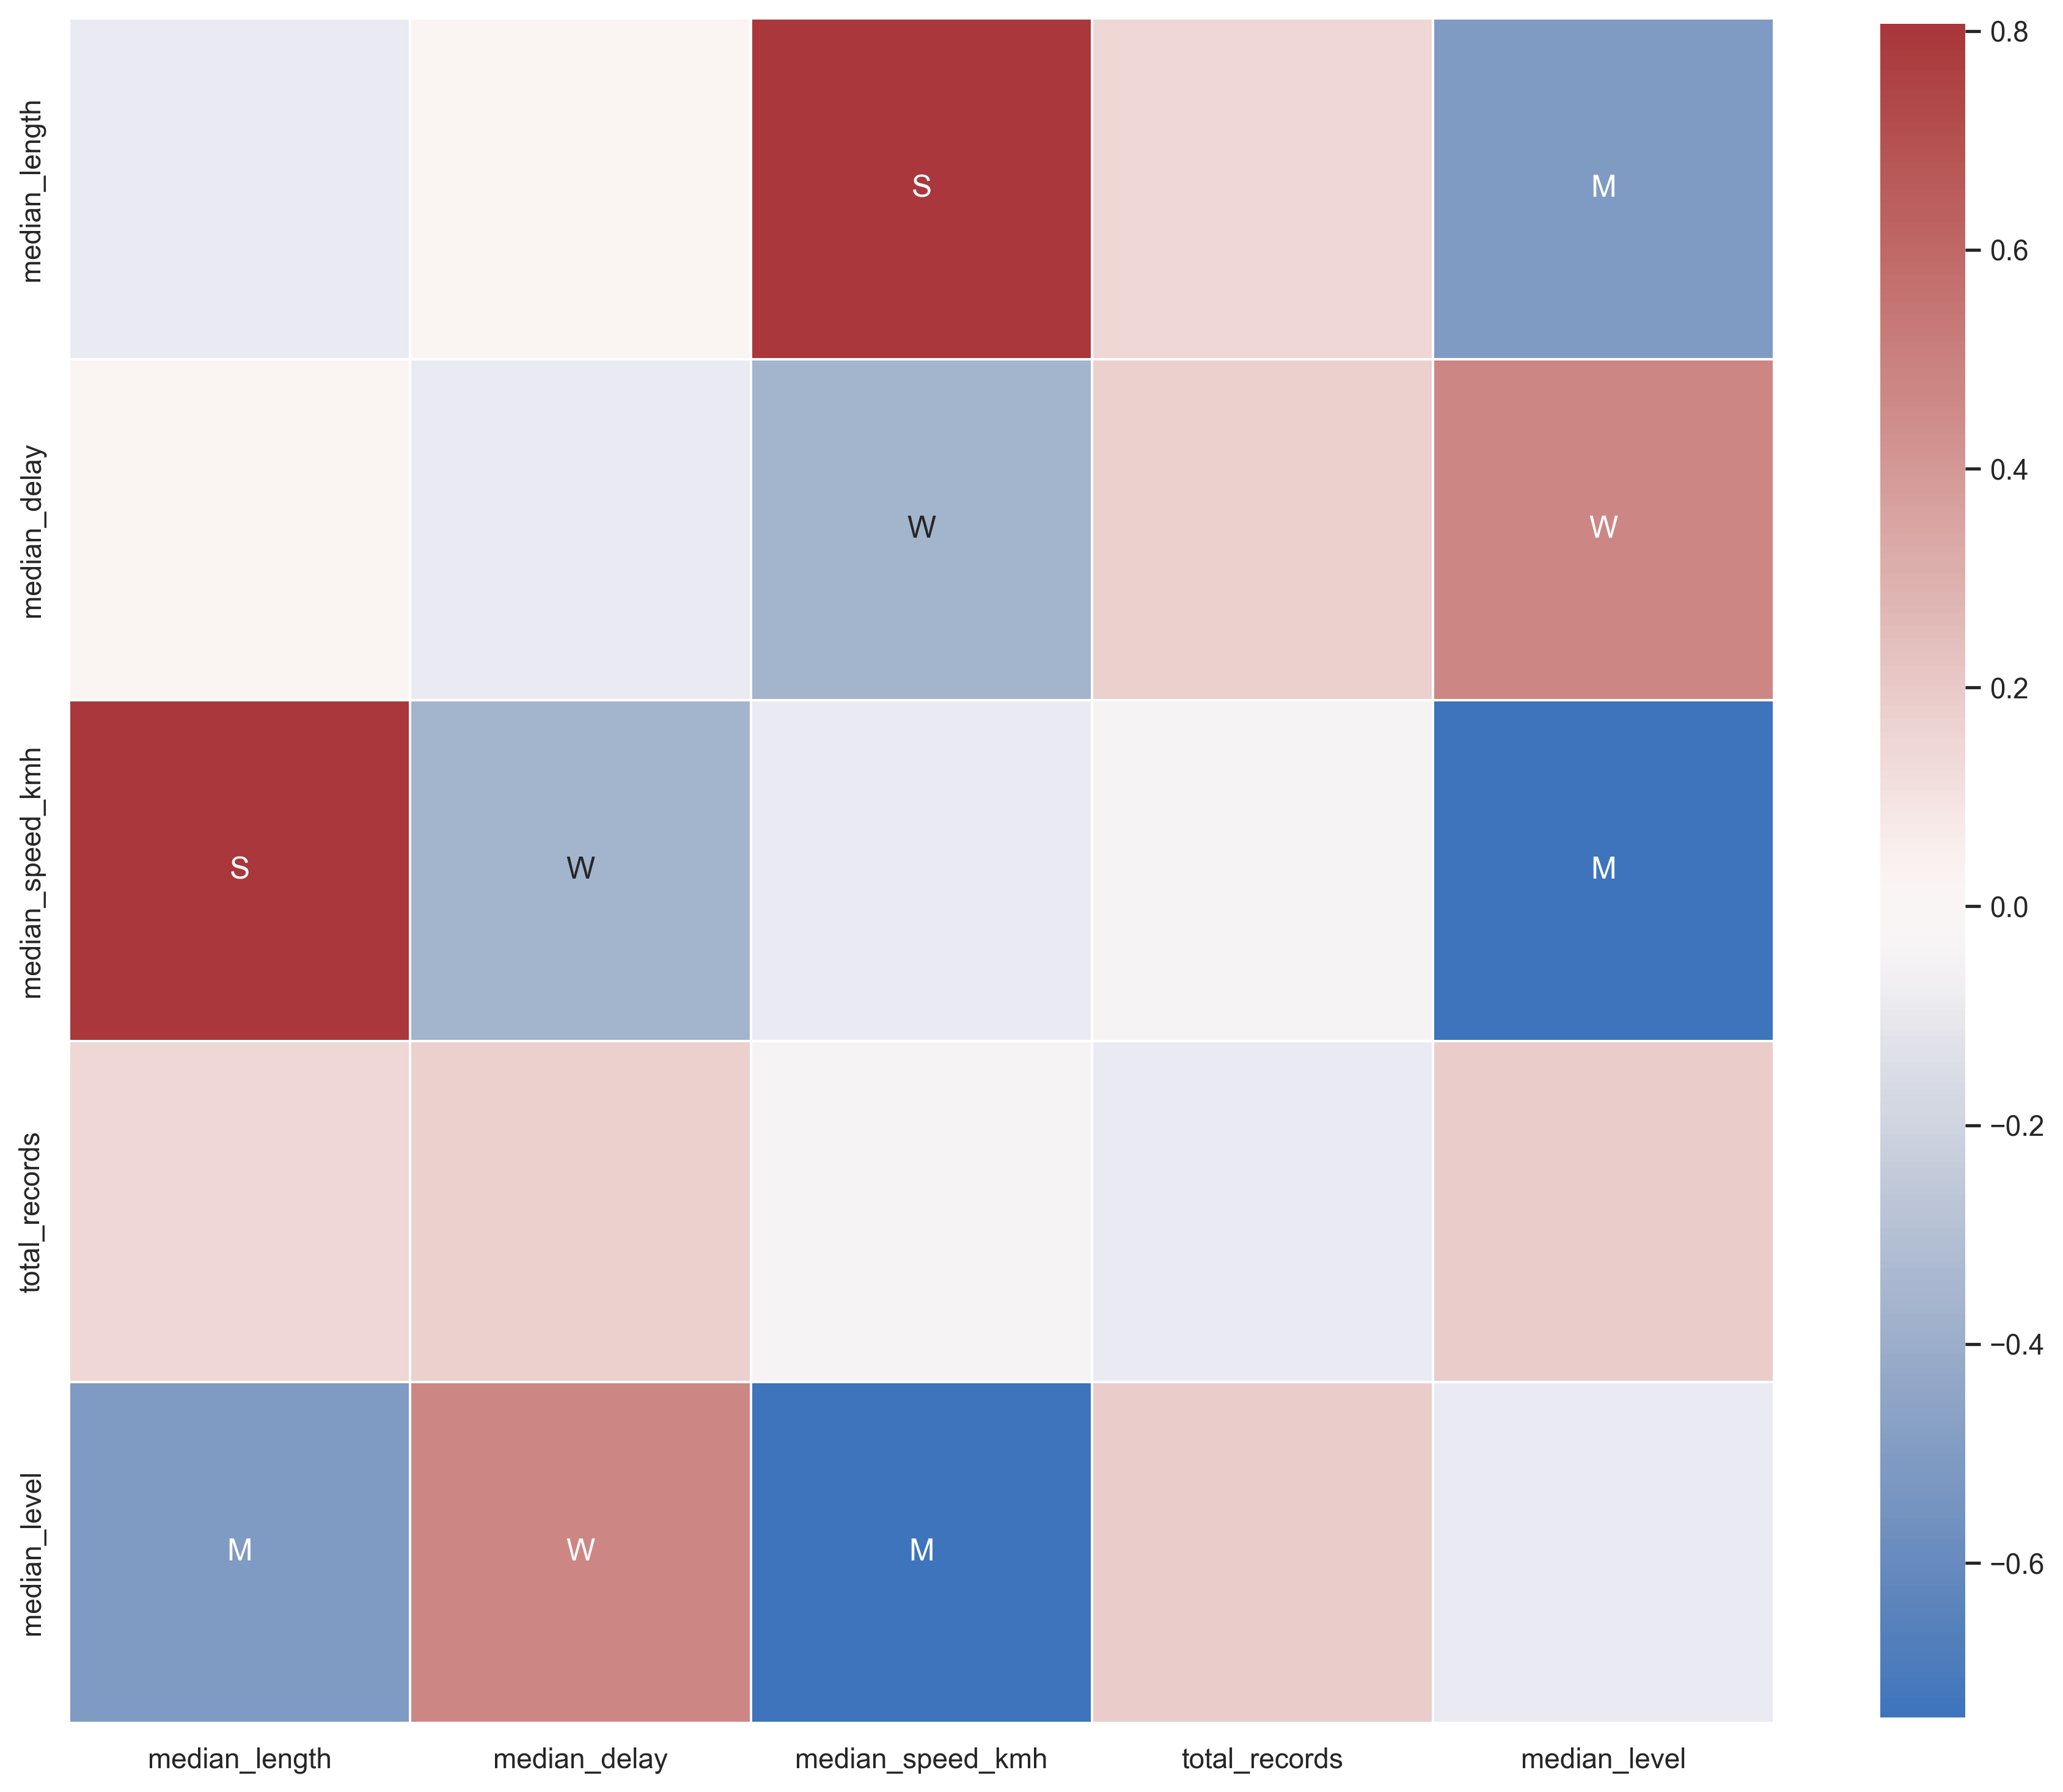

In [107]:
# Computes feature correlation
df_corr = (
        jams
        .loc[:, ['median_length', 'median_delay', 'median_speed_kmh', 'total_records', 'median_level']]
        .corr(method="pearson")
    )

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
        np.where(np.abs(df_corr)>0.5, "M",
        np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [108]:
jams.to_parquet('..\\dataset\\aggregate_median_jams_bogor_eda.parquet')